In [2]:
#posterior plotting of multiple simulated parameter sets 
import pandas as pd 
import matplotlib.pyplot as plt 
import glob 
import seaborn as sns
import os
import ast
import numpy as np
import re
import pymc

In [8]:
#read in the data 
def process_file(file_path):
    df = pd.read_csv(file_path)

   
    data = {
        # 'a': df['a'],
        # 'z': df['z'],
        # 't': df['t'], 
        # 'p_target': df['p_target'],
        # 'p_outer': df['p_outer'],
        # 'p_inner': df['p_inner'], 
        # 'r': df['r'], 
        # 'sda': df['sda'], 
        # 'ratio': df['ratio'],
        'true_theta': df['true theta'],
        'est_target': df['est target'],
        'est_t': df['est t'],
        'est_r': df['est r'],
        'est_sda': df['est sda'],
        'est_a': df['est a'],
        'est_ratio': df['est_ratio']
    }
    return pd.DataFrame(data)


#paths to saved parameter values 

# file_paths = glob.glob(r"C:\Users\super\OneDrive\Desktop\Brown research stuff\saved models for shrinking spot\estimated param values for generated params\*.csv")
# file_paths = glob.glob(r"C:\Users\super\OneDrive\Desktop\Brown research stuff\Brown research stuff\saved models for shrinking spot\estimated param values new bounds\*.csv")
file_paths = glob.glob(r"C:\Users\super\OneDrive\Desktop\Brown research stuff\Brown research stuff\saved models for shrinking spot\estimated param values new new bounds\*.csv")
# file_paths = glob.glob(r"C:\Users\super\OneDrive\Desktop\Brown research stuff\Brown research stuff\saved models for shrinking spot\new everything\*.csv")
# file_paths = glob.glob(r"C:\Users\super\OneDrive\Desktop\Brown research stuff\Brown research stuff\saved models for shrinking spot\new estimated param values\*.csv")
# file_paths = glob.glob(r"C:\Users\super\OneDrive\Desktop\Brown research stuff\Brown research stuff\saved models for shrinking spot\param values with congruency\*.csv")
# for file in file_paths: 
#     print(file)

dataframe = [process_file(file) for file in file_paths]

combined_df = pd.concat(dataframe, ignore_index=True)
print(combined_df)





                                           true_theta  est_target  est_t  \
0   {'a': 2.429577394844039, 'z': 0.83210292171428...       2.630  1.371   
1   {'a': 2.698229565132079, 'z': 0.71849503342473...       4.360  0.029   
2   {'a': 1.1431286731739894, 'z': 0.8778690847748...       4.038  0.268   
3   {'a': 1.496009565537526, 'z': 0.13574012160276...       3.753  0.919   
4   {'a': 1.6160837274965112, 'z': 0.5281435065738...       4.169  1.144   
..                                                ...         ...    ...   
95  {'a': 0.9814564580541021, 'z': 0.3853926048250...       4.455  1.539   
96  {'a': 0.3319522845005242, 'z': 0.7628952079513...       4.526  1.874   
97  {'a': 1.0240240932334463, 'z': 0.5736474617459...       3.176  0.603   
98  {'a': 0.6029665814066762, 'z': 0.7124210839190...       5.115  1.600   
99  {'a': 0.33513167262546417, 'z': 0.557747207527...       2.755  0.286   

    est_r  est_sda  est_a                                          est_ratio  
0   0.04

In [9]:
print(combined_df['true_theta'])

params = ['a', 't', 'p_target', 'r', 'sda', 'ratio'] 
for param in params: 
    combined_df[f'{param}'] = combined_df['true_theta'].apply(lambda x: ast.literal_eval(x)[f'{param}'])



def extract_float(xarray_str): #function to extract the float in the ratio object 
    match = re.search(r'array\(([\d.]+)\)', xarray_str)
    if match:
        return float(match.group(1))
    return None

combined_df['est_ratio'] = combined_df['est_ratio'].apply(extract_float)

print(combined_df['est_ratio'])

0     {'a': 2.429577394844039, 'z': 0.83210292171428...
1     {'a': 2.698229565132079, 'z': 0.71849503342473...
2     {'a': 1.1431286731739894, 'z': 0.8778690847748...
3     {'a': 1.496009565537526, 'z': 0.13574012160276...
4     {'a': 1.6160837274965112, 'z': 0.5281435065738...
                            ...                        
95    {'a': 0.9814564580541021, 'z': 0.3853926048250...
96    {'a': 0.3319522845005242, 'z': 0.7628952079513...
97    {'a': 1.0240240932334463, 'z': 0.5736474617459...
98    {'a': 0.6029665814066762, 'z': 0.7124210839190...
99    {'a': 0.33513167262546417, 'z': 0.557747207527...
Name: true_theta, Length: 100, dtype: object
0      32.189542
1      45.831458
2      81.133955
3      80.830765
4     122.695813
         ...    
95     93.519608
96     40.556329
97     85.198506
98     64.966587
99    182.041787
Name: est_ratio, Length: 100, dtype: float64


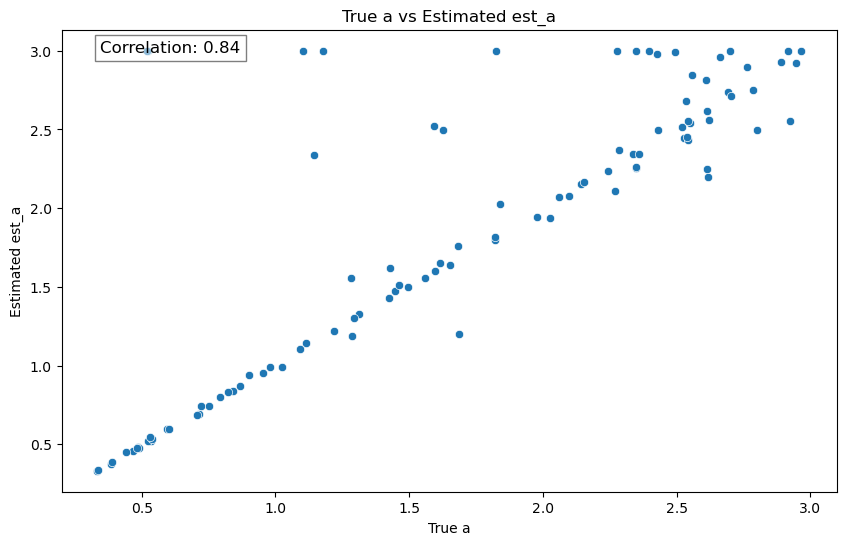

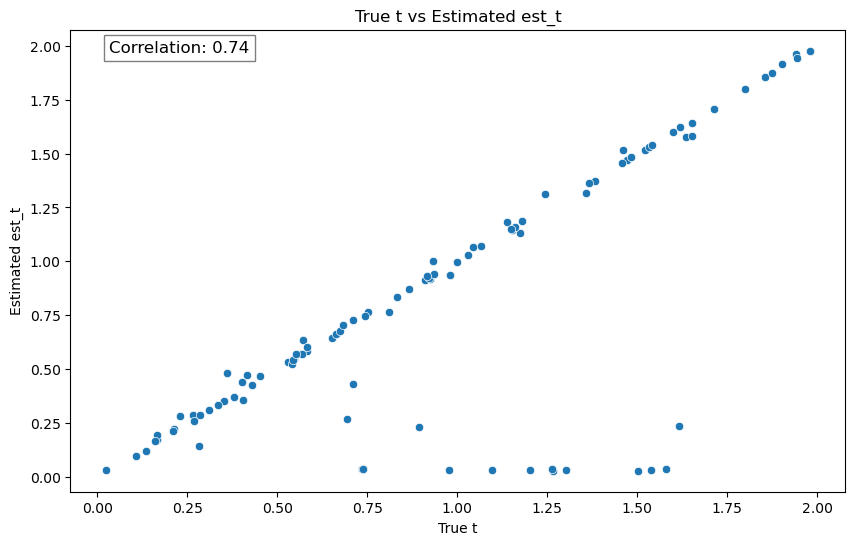

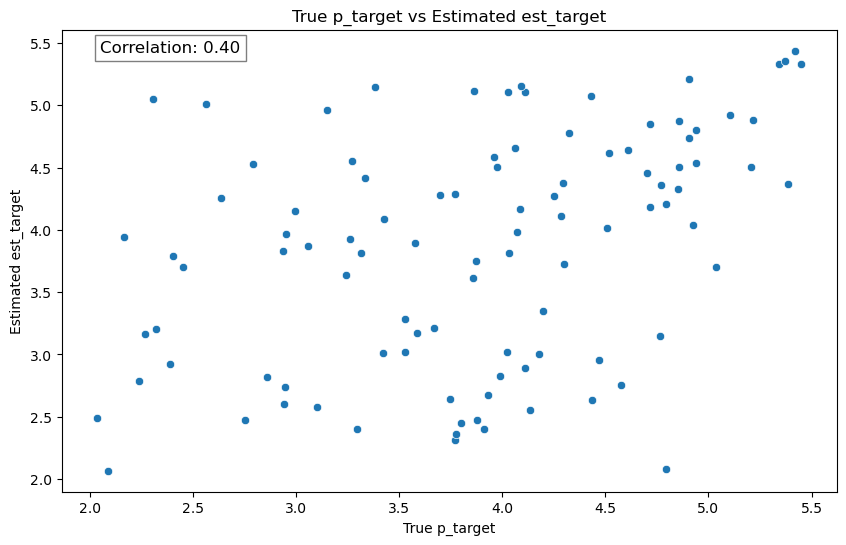

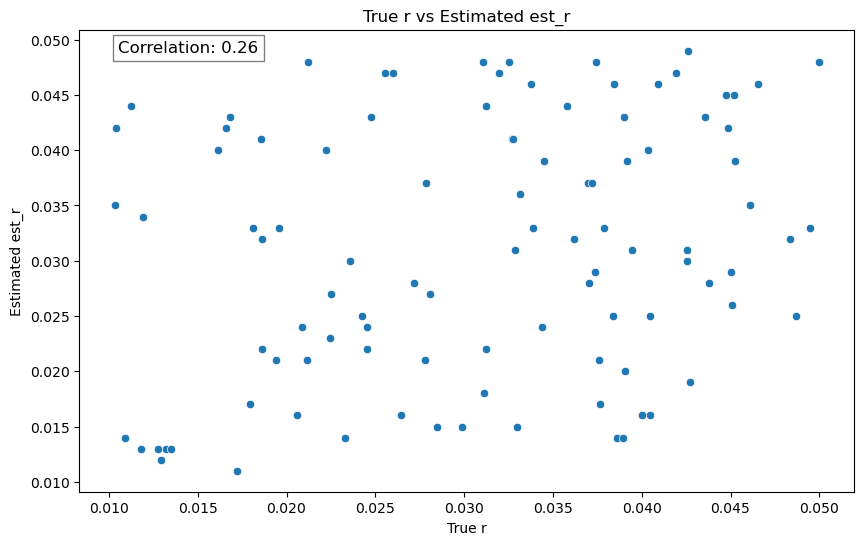

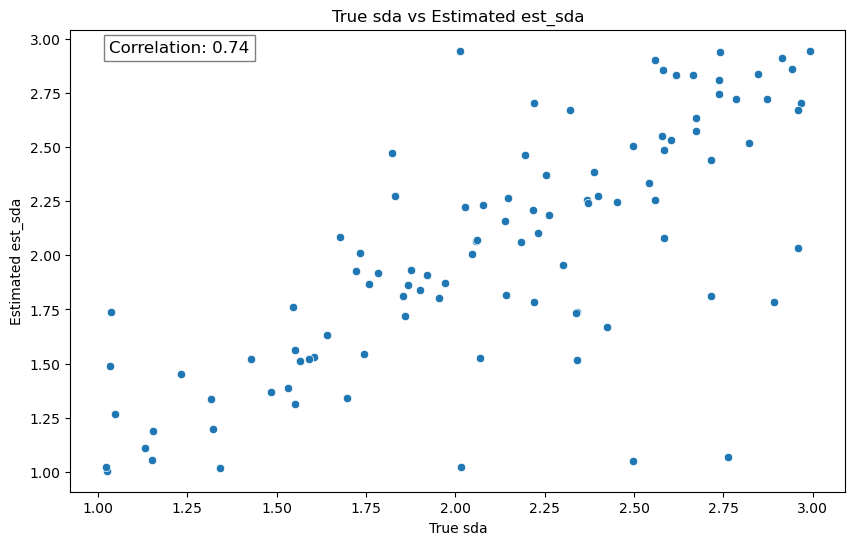

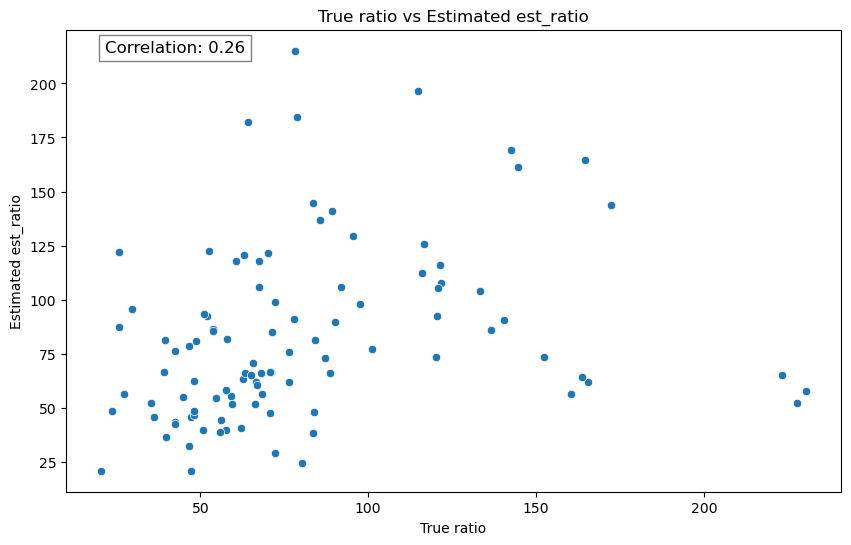

In [10]:
def plot_estimated_vs_true(true_param, est_param):
    correlation= combined_df[f'{true_param}'].corr(combined_df[est_param])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=combined_df[f'{true_param}'], y=combined_df[est_param])
    plt.title(f'True {true_param} vs Estimated {est_param}')
    plt.xlabel(f'True {true_param}')
    plt.ylabel(f'Estimated {est_param}')

    plt.annotate(f'Correlation: {correlation:.2f}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction', 
                 fontsize=12, 
                 backgroundcolor='white',
                 bbox=dict(facecolor='white', alpha=0.5))
  
    plt.show()


# parameters = ['est_target', 'est_t', 'est_r', 'est_sda', 'est_a', 'est_ratio']
# for param in parameters:
parameter_mapping = {
    'a': 'est_a',
    't': 'est_t',
    'p_target': 'est_target',
    'r': 'est_r',
    'sda': 'est_sda', 
    'ratio': 'est_ratio'
}
for true_param, est_param in parameter_mapping.items():
    plot_estimated_vs_true(true_param, est_param)


In [4]:
def process_file(file_path):
    df = pd.read_csv(file_path)

    
    data = {
        'true_theta': df['true theta'],
        'est_v': df['v'],
        'est_a': df['est a'],
        'est_z': df['est z'],
        'est_t': df['est t'],
        'est_shape': df['est shape'],
        'est_scale': df['est scale'],
        'est_c': df['est c']
    }
    return pd.DataFrame(data)
file_paths = glob.glob(r"C:\Users\super\OneDrive\Desktop\Brown research stuff\saved model for gamma drift\estimated param values\*.csv")
# for file in file_paths: 
#     print(file)
dataframe = [process_file(file) for file in file_paths]

combined_df = pd.concat(dataframe, ignore_index=True)

In [5]:
params = ['v', 'a', 'z', 't', 'shape', 'scale', 'c'] 
for param in params: 
    combined_df[f'{param}'] = combined_df['true_theta'].apply(lambda x: ast.literal_eval(x)[f'{param}'])

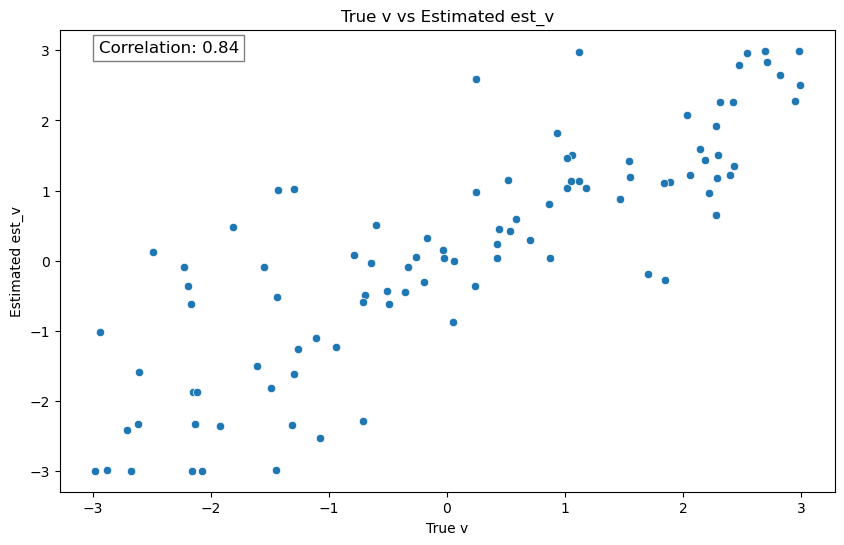

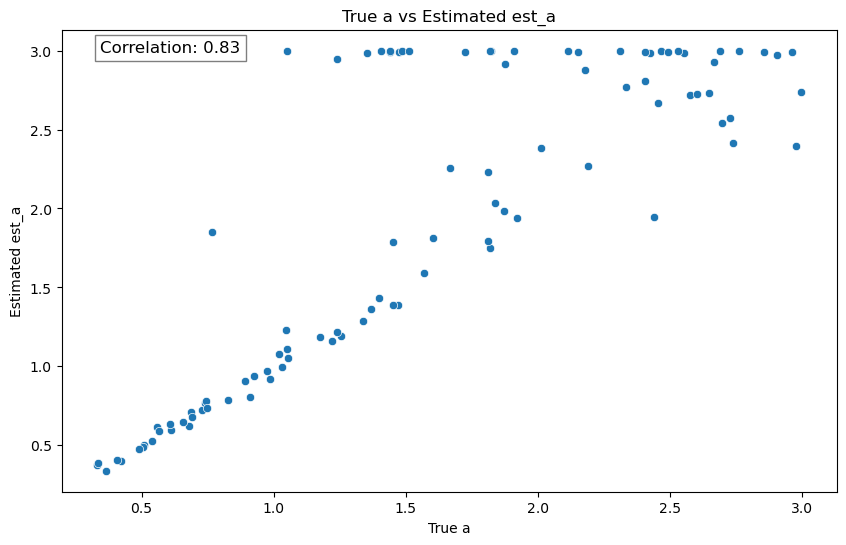

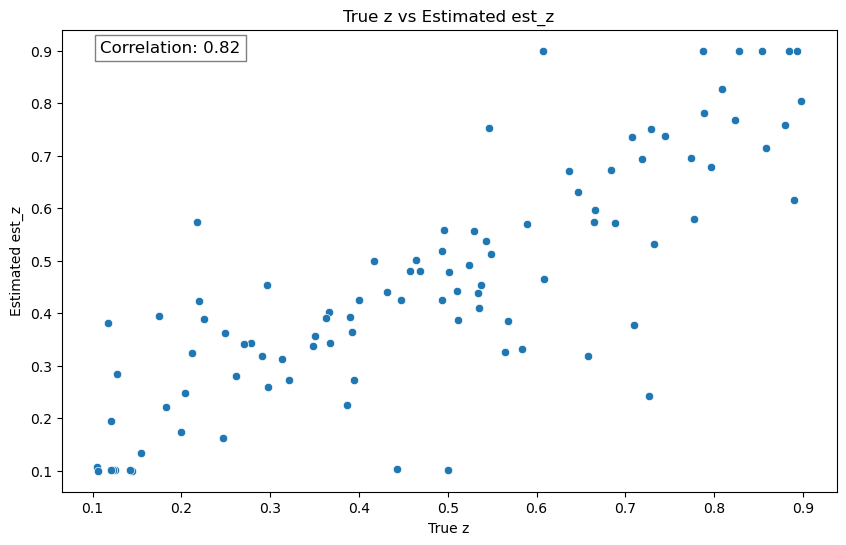

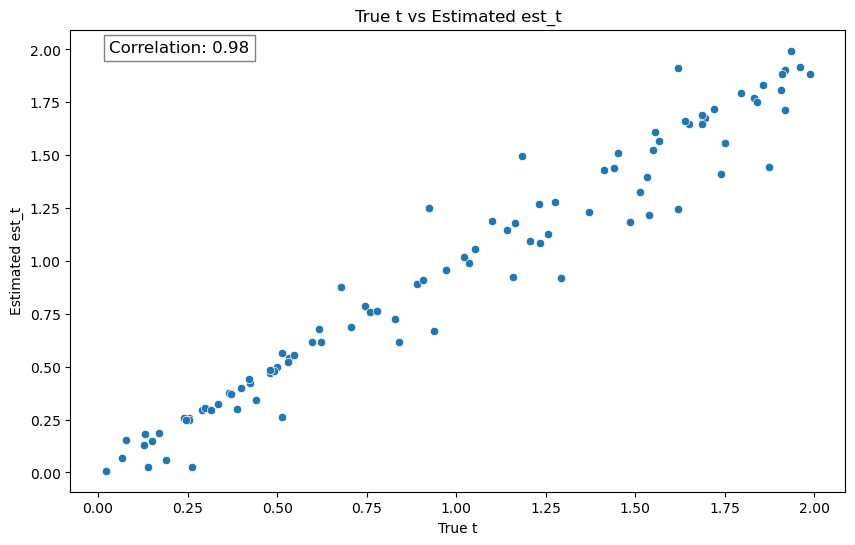

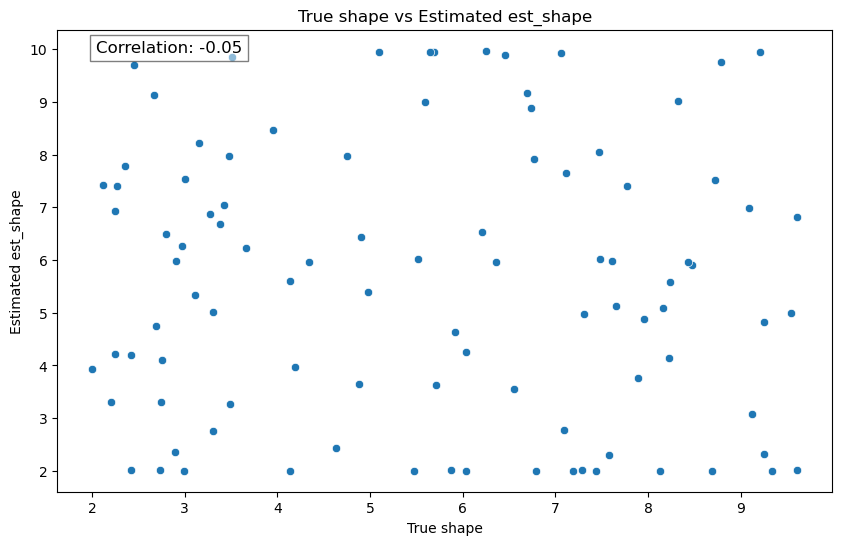

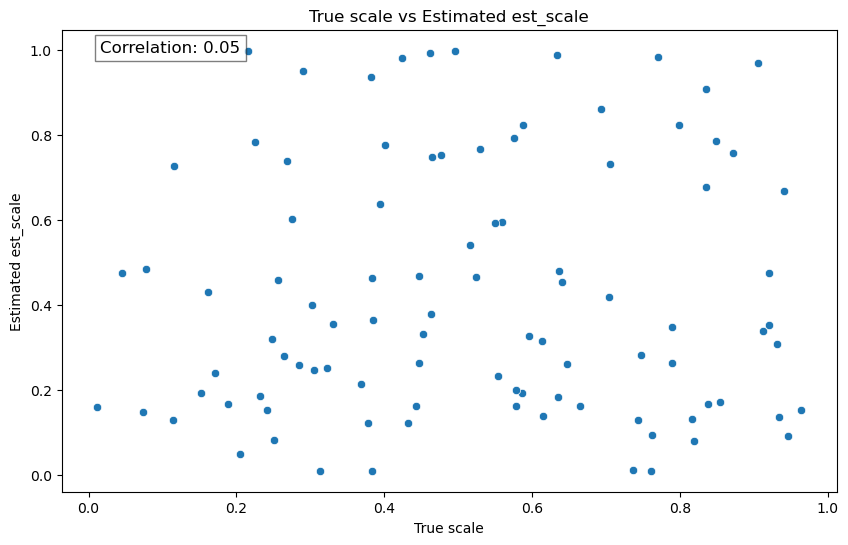

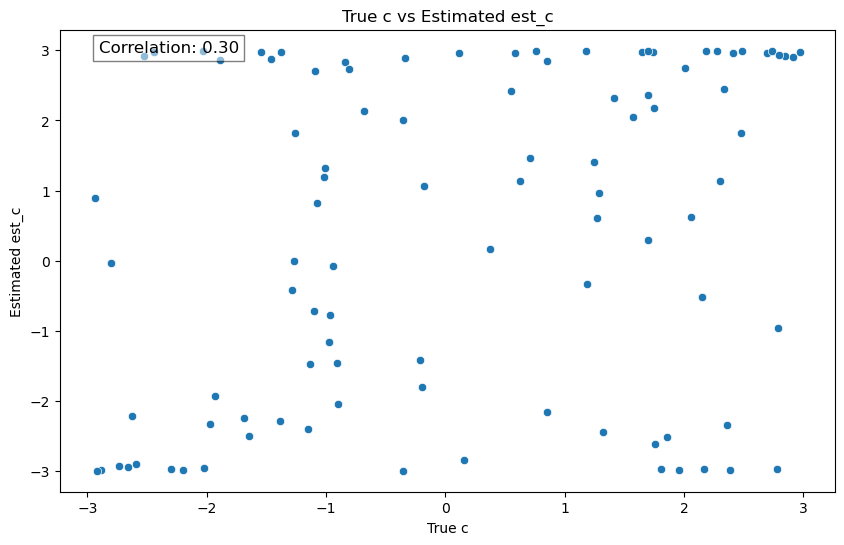

In [6]:
def plot_estimated_vs_true(true_param, est_param):
    correlation= combined_df[f'{true_param}'].corr(combined_df[est_param])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=combined_df[f'{true_param}'], y=combined_df[est_param])
    plt.title(f'True {true_param} vs Estimated {est_param}')
    plt.xlabel(f'True {true_param}')
    plt.ylabel(f'Estimated {est_param}')

    plt.annotate(f'Correlation: {correlation:.2f}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction', 
                 fontsize=12, 
                 backgroundcolor='white',
                 bbox=dict(facecolor='white', alpha=0.5))
  
    plt.show()


# parameters = ['est_target', 'est_t', 'est_r', 'est_sda', 'est_a', 'est_ratio']
# for param in parameters:
parameter_mapping = {
    'v': 'est_v',
    'a': 'est_a', 
    'z': 'est_z', 
    't': 'est_t',
    'shape': 'est_shape',
    'scale': 'est_scale',
    'c': 'est_c', 
}
for true_param, est_param in parameter_mapping.items():
    plot_estimated_vs_true(true_param, est_param)


                                           true_theta  est_target  est_t  \
0   {'a': 2.429577394844039, 'z': 0.83210292171428...       2.630  1.371   
1   {'a': 2.698229565132079, 'z': 0.71849503342473...       4.360  0.029   
2   {'a': 1.1431286731739894, 'z': 0.8778690847748...       4.038  0.268   
3   {'a': 1.496009565537526, 'z': 0.13574012160276...       3.753  0.919   
4   {'a': 1.6160837274965112, 'z': 0.5281435065738...       4.169  1.144   
..                                                ...         ...    ...   
95  {'a': 0.9814564580541021, 'z': 0.3853926048250...       4.455  1.539   
96  {'a': 0.3319522845005242, 'z': 0.7628952079513...       4.526  1.874   
97  {'a': 1.0240240932334463, 'z': 0.5736474617459...       3.176  0.603   
98  {'a': 0.6029665814066762, 'z': 0.7124210839190...       5.115  1.600   
99  {'a': 0.33513167262546417, 'z': 0.557747207527...       2.755  0.286   

    est_r  est_sda  est_a   est_ratio         a         t  p_target         r  \
0   0.

C:\Users\super\AppData\Local\Temp\ipykernel_31064\2717265163.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(num)


Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x0000029781319F80>, 'boundary_multiplicative': True}
This is the sim param dict: {'max_t': 20, 's': 1.0, 'n_samples': 1000, 'n_trials': 1, 'delta_t': 0.001, 'random_state': None, 'return_option': 'full', 'smooth': True}
{'a': 0.38667519917903753, 'z': 0.4907568914672844, 't': 0.1660610830070894, 'p_target': 2.1659832801654515, 'p_outer': 2.1659832801654515, 'p_inner': -2.1659832801654515, 'r': 0.0328767739306008, 'sda': 2.3400102312252438}
Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x0000029781319F80>, 'boundary_multiplicative': True}
This is the sim param dict: {'max_t': 20, 's': 1.0, 'n_samples': 1000, 'n_trials': 1, 'delta_t': 0.001, 'random_state': None, 'return_option': 'full', 'smooth': True}
Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x0000029781319F80>, 'boundary_multiplicative': True}
This is the sim param dict: {'max_t': 20, 's': 1.

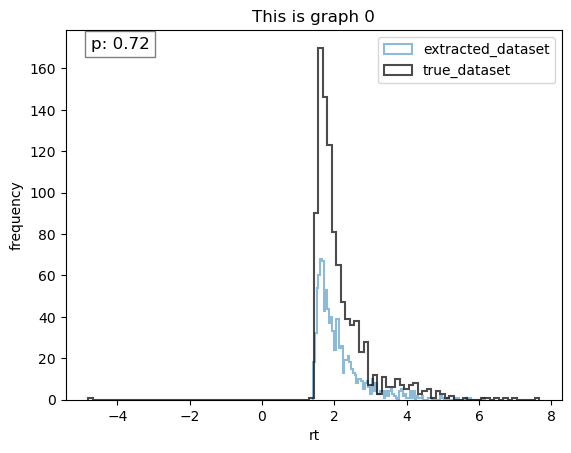

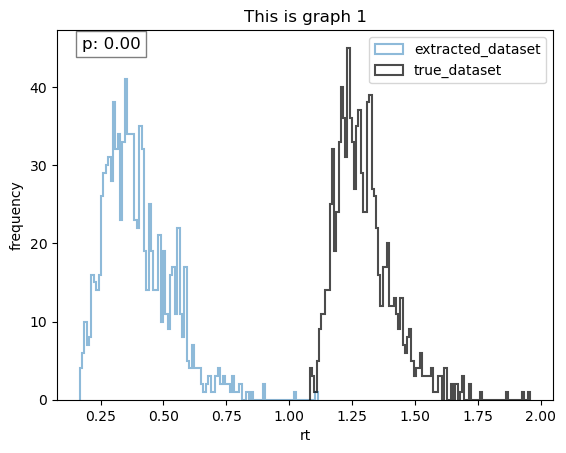

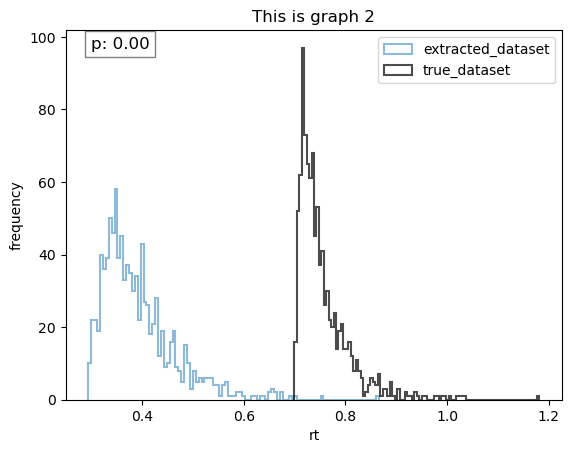

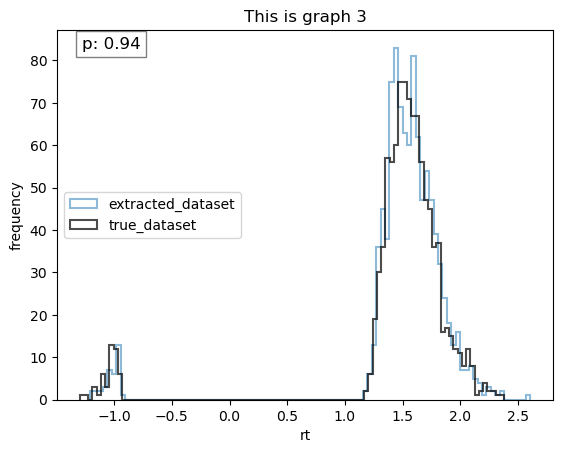

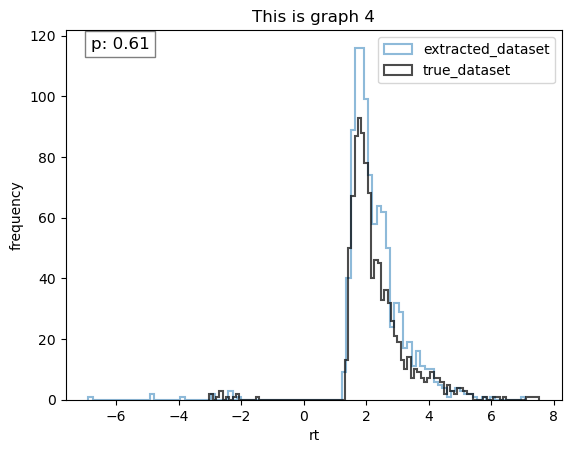

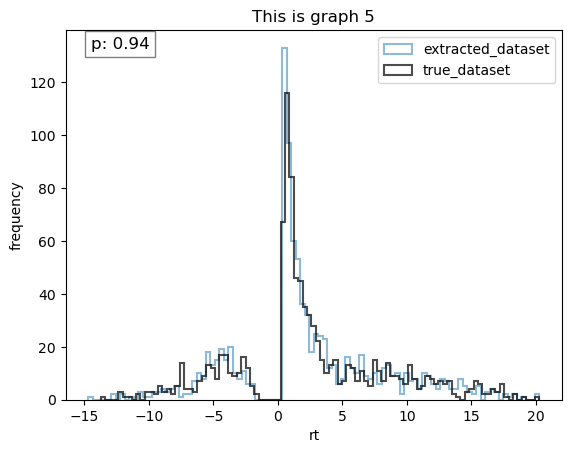

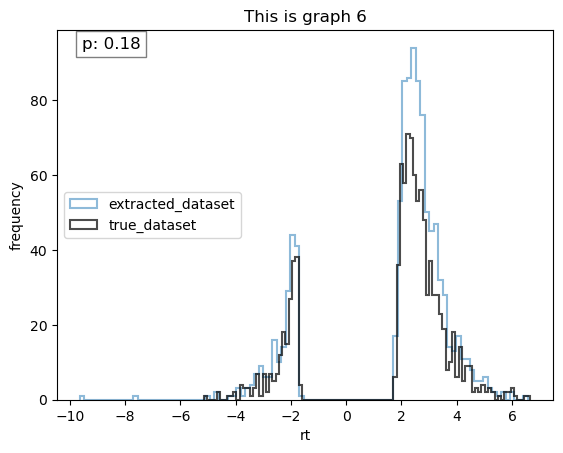

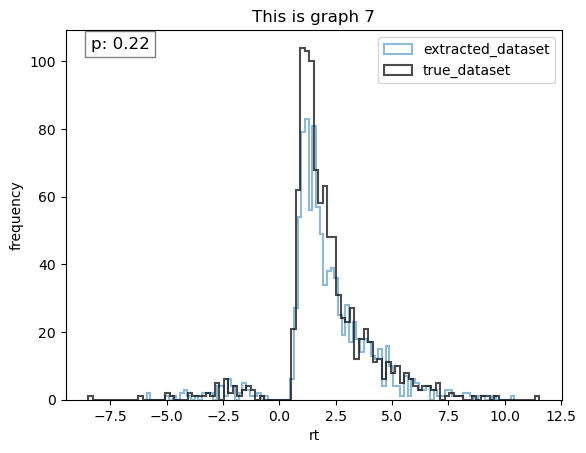

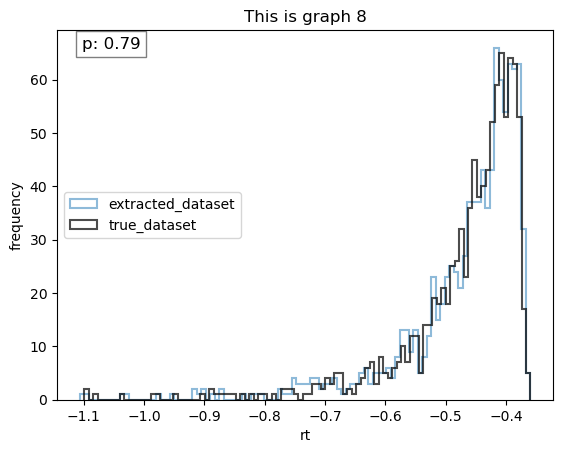

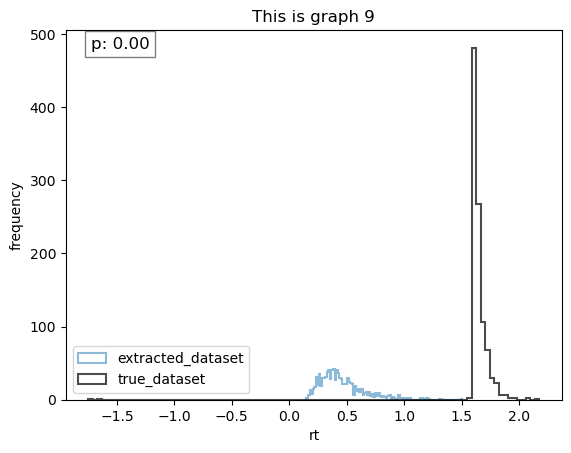

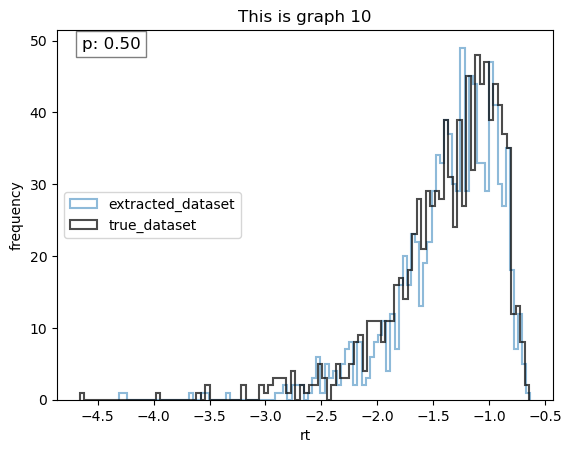

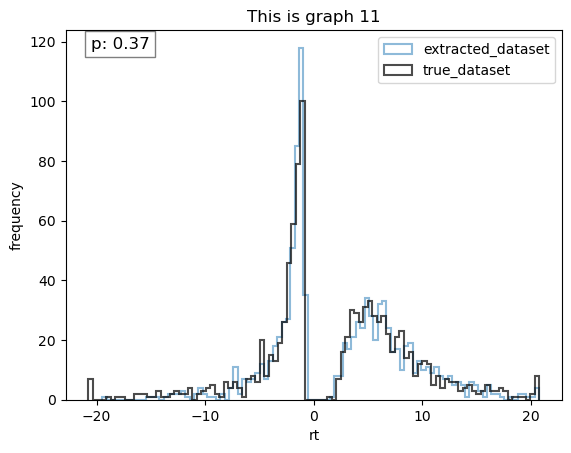

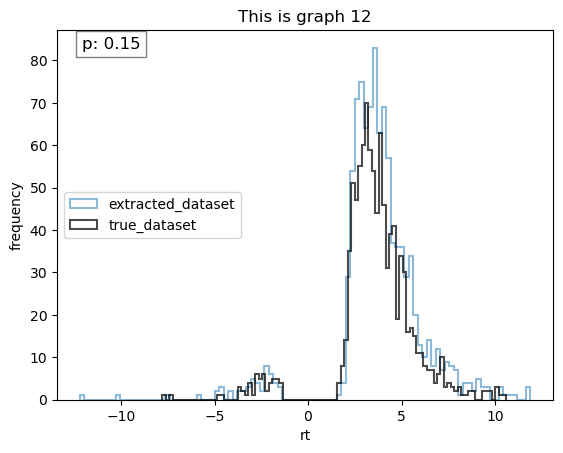

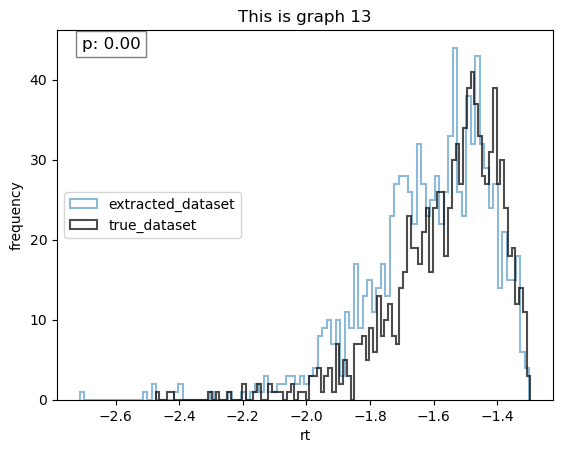

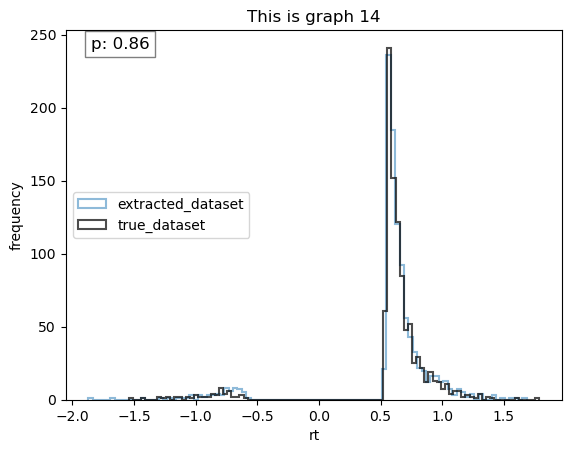

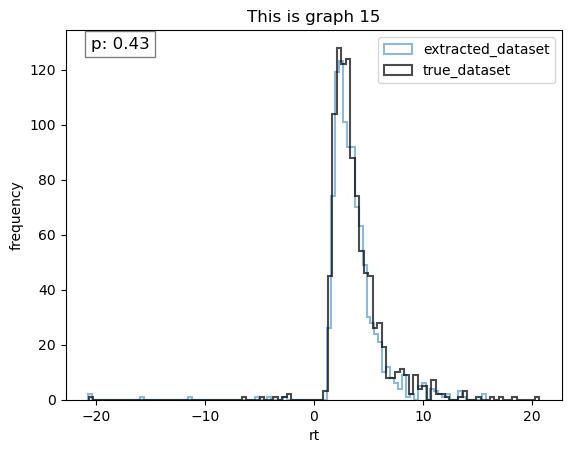

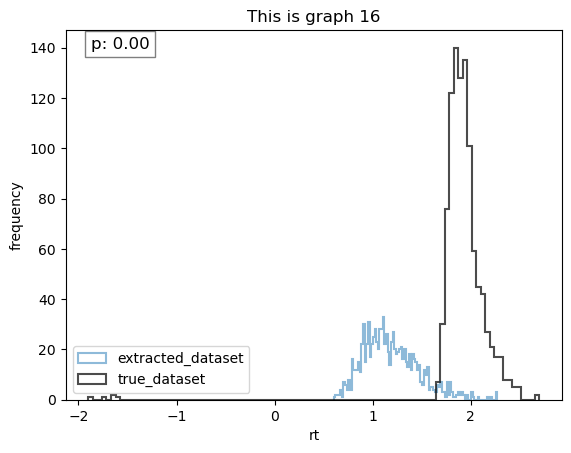

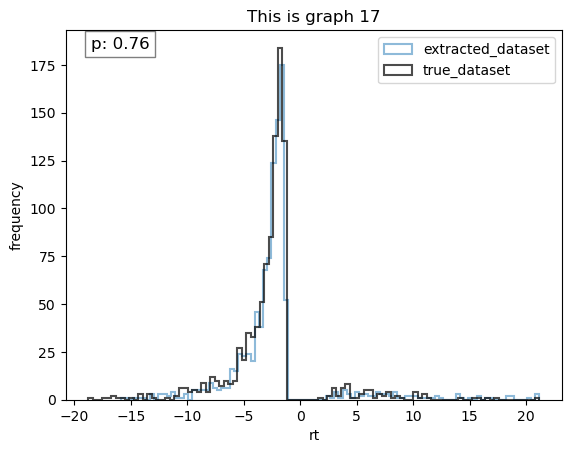

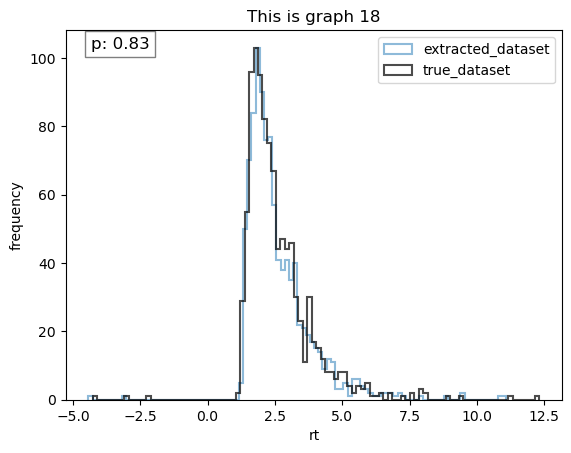

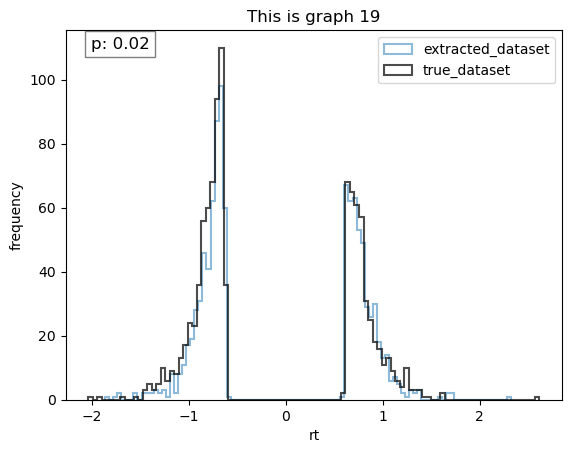

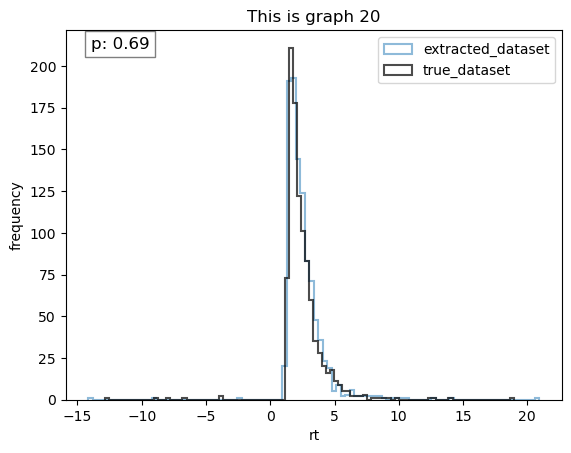

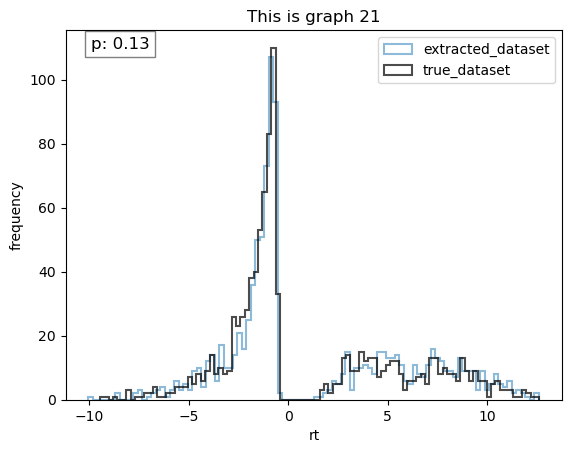

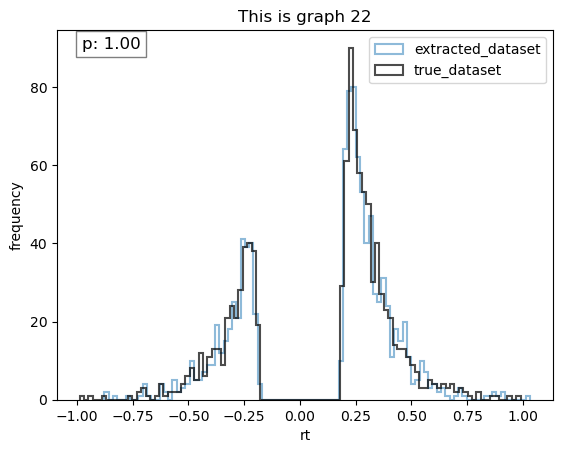

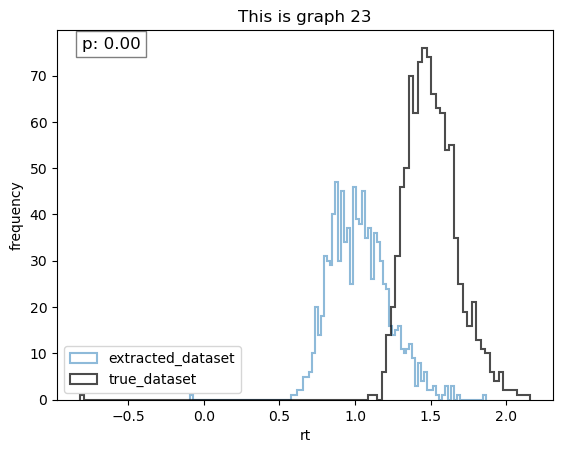

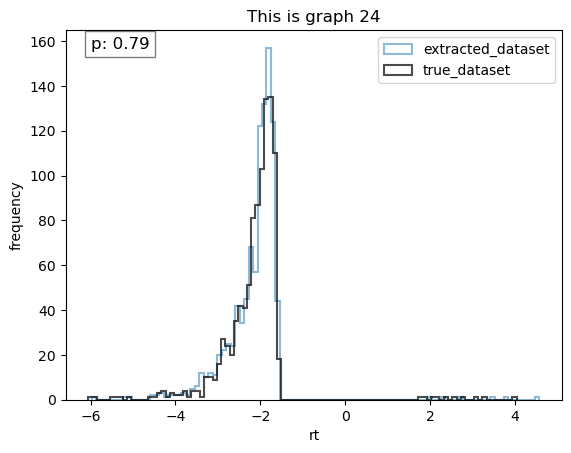

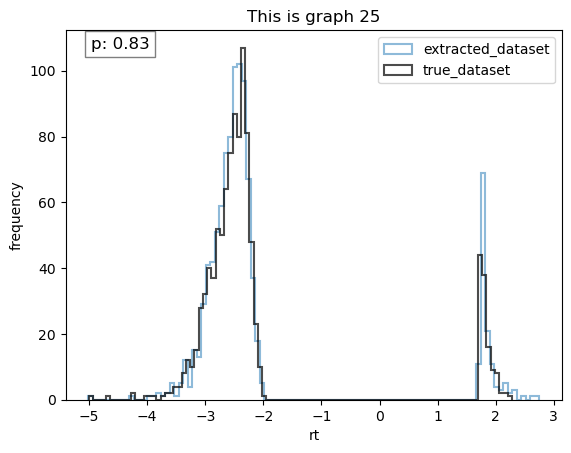

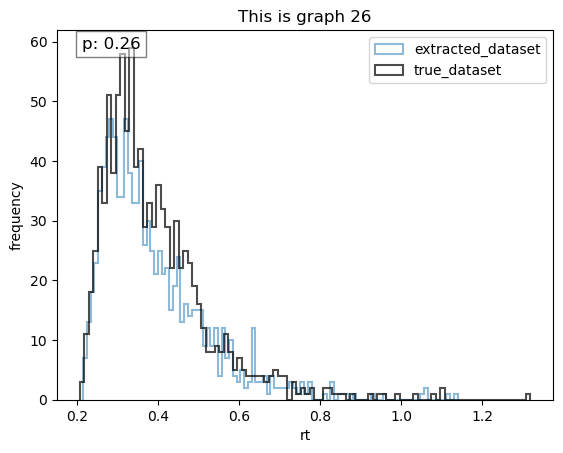

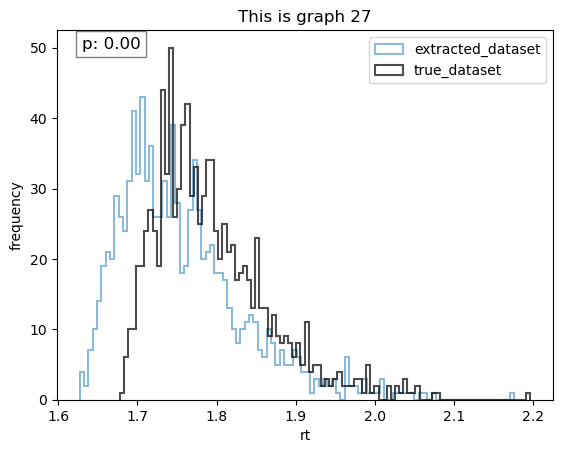

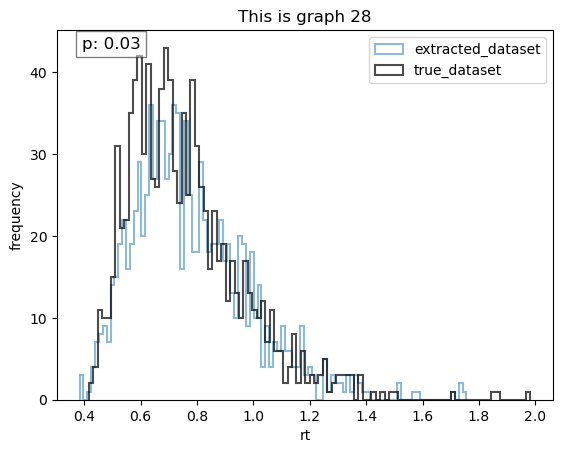

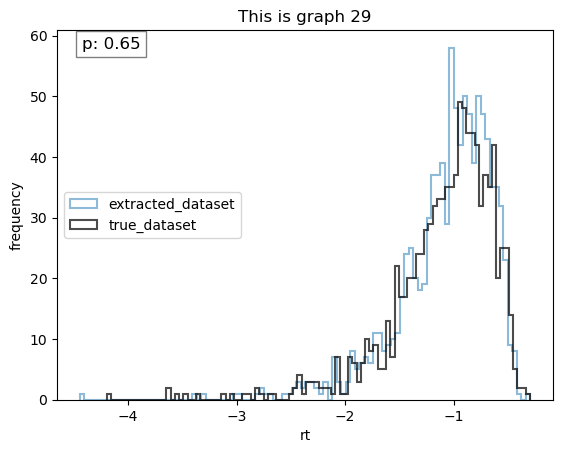

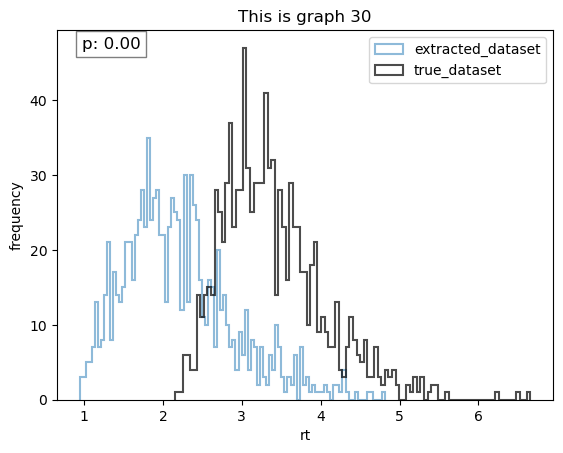

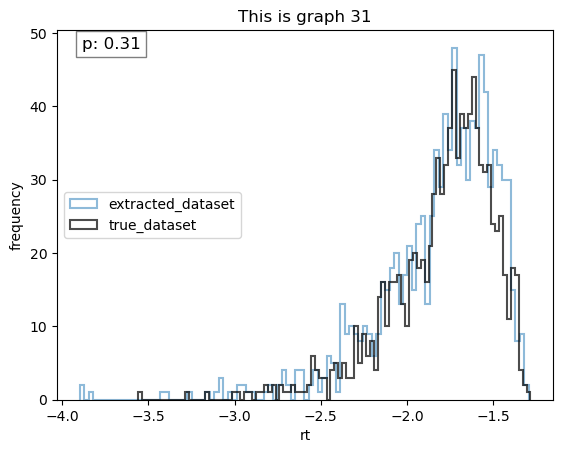

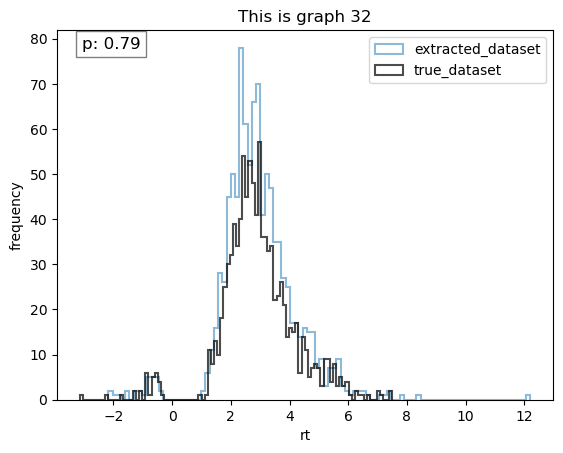

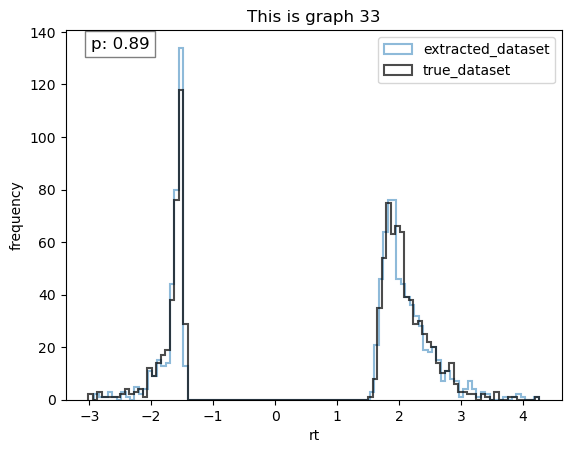

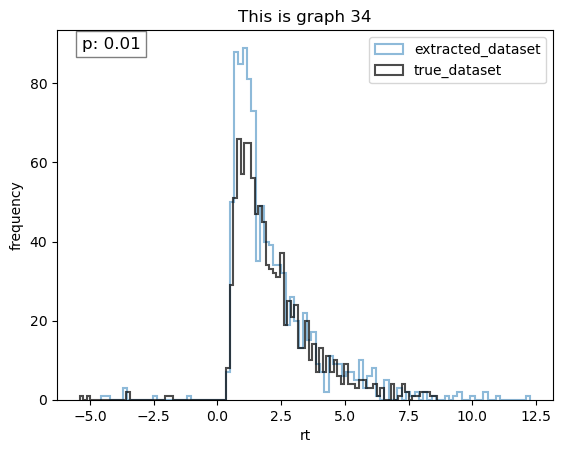

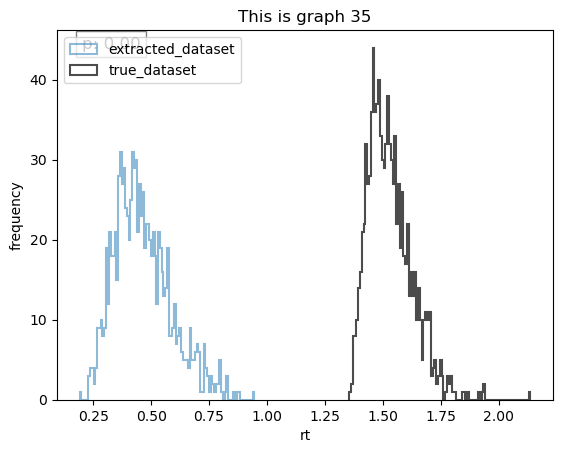

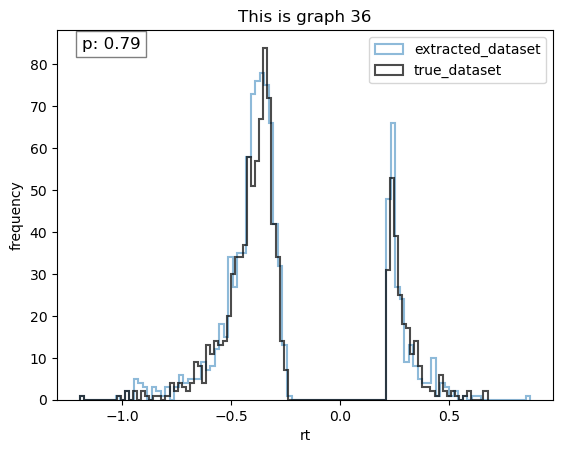

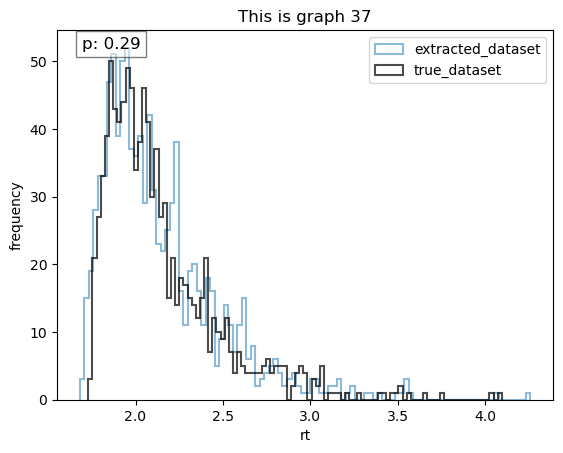

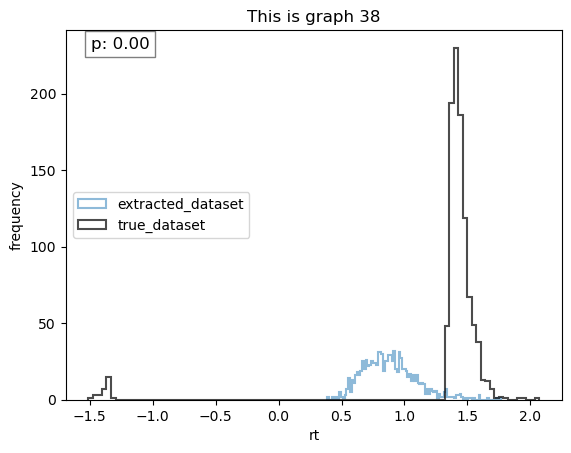

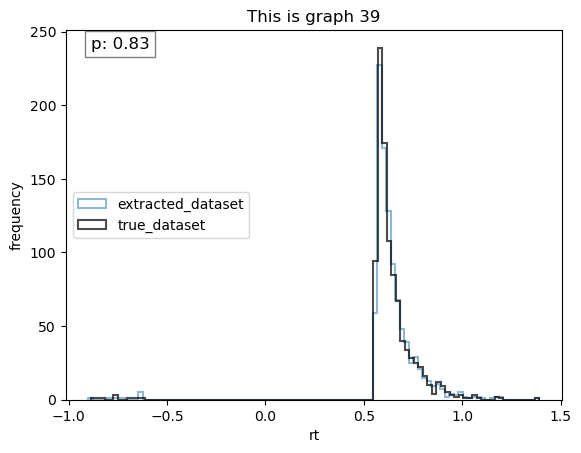

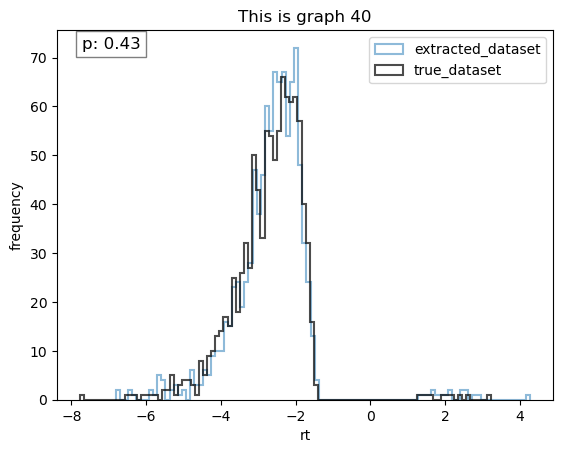

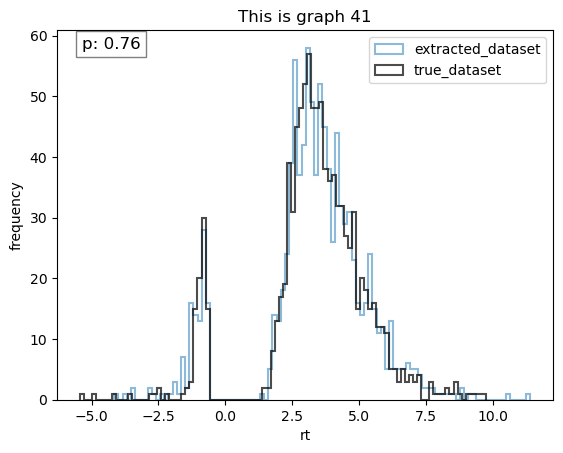

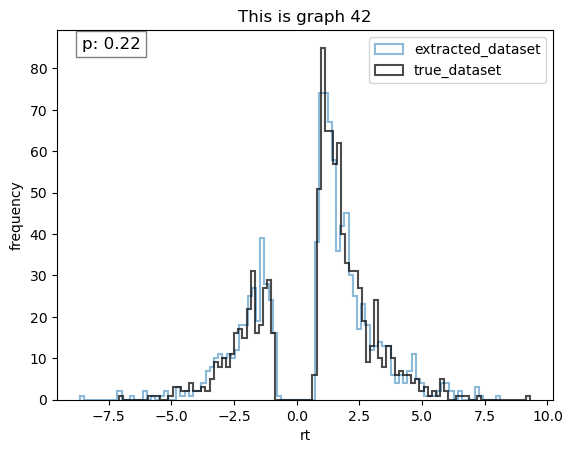

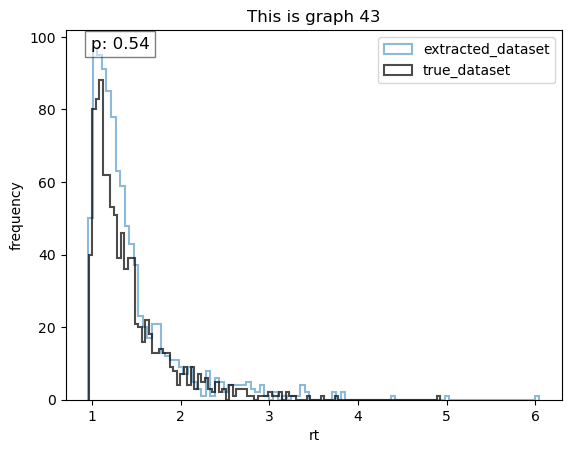

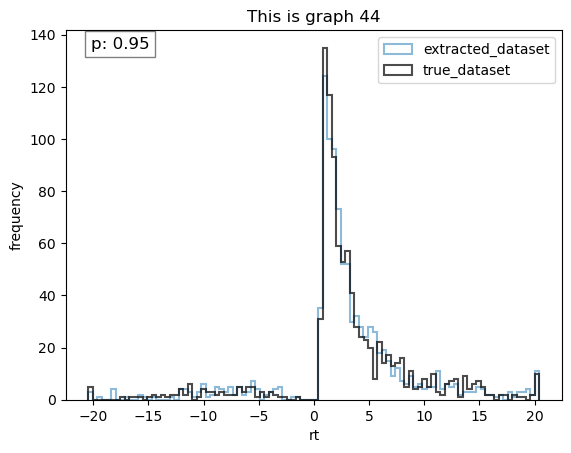

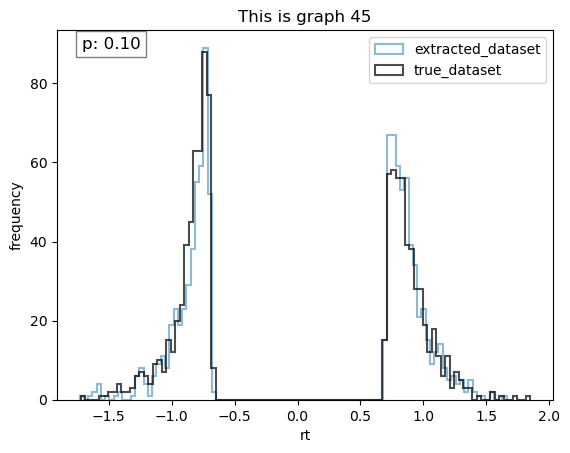

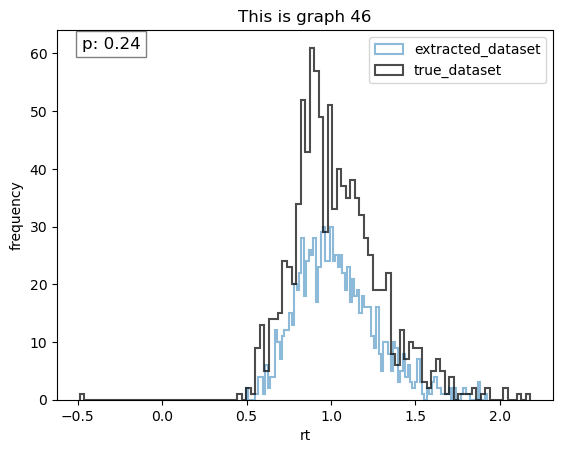

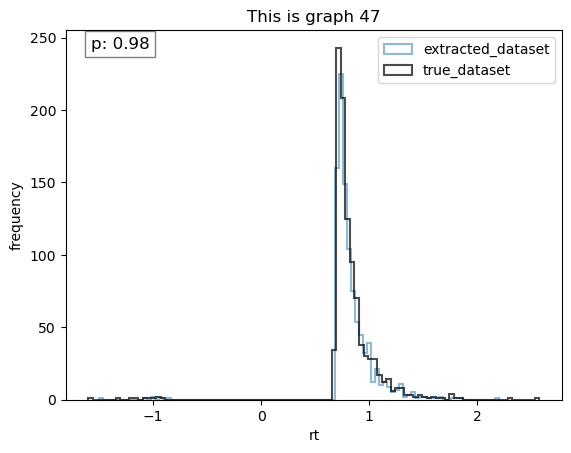

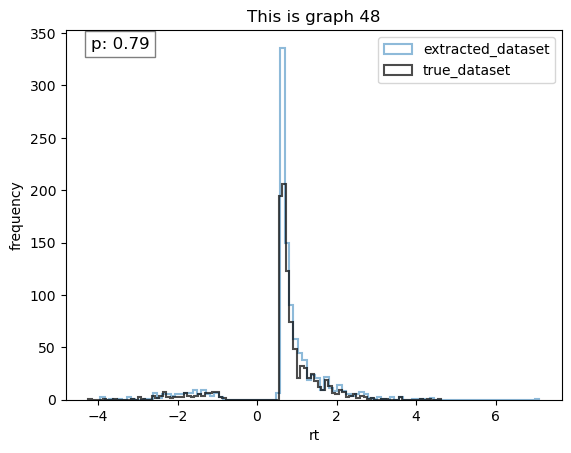

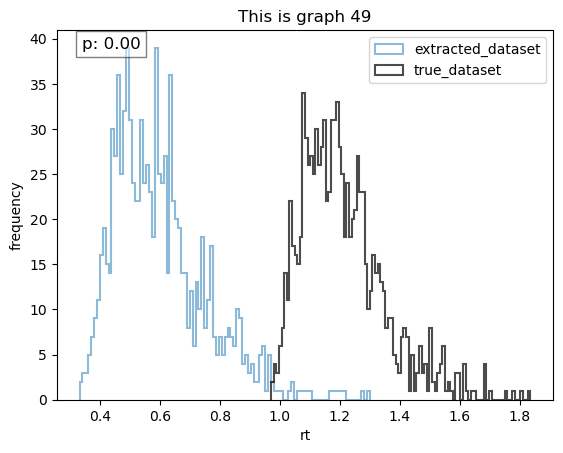

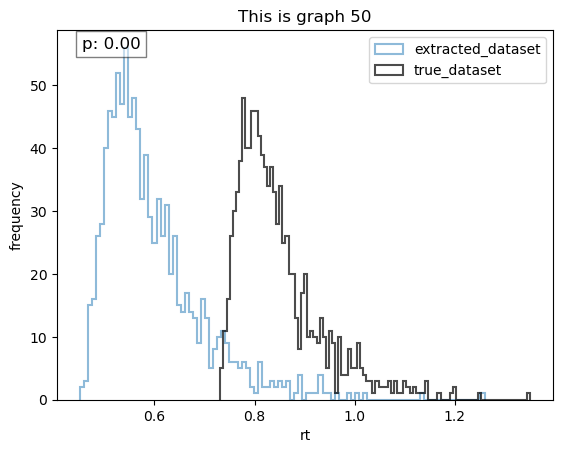

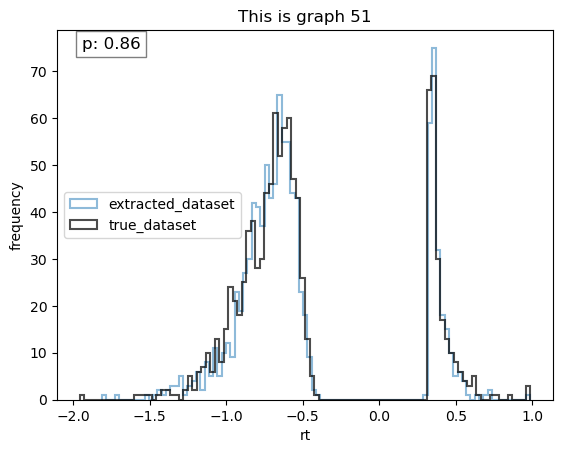

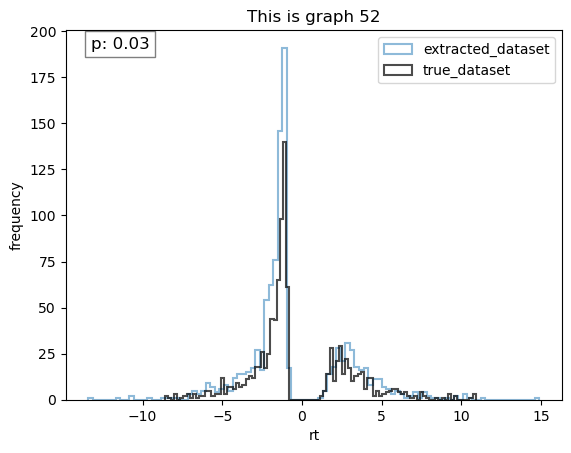

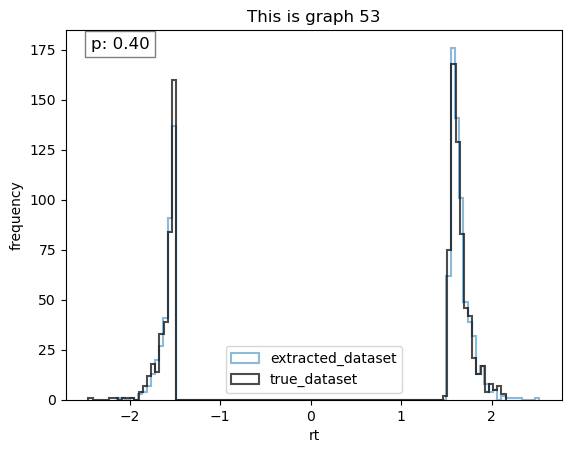

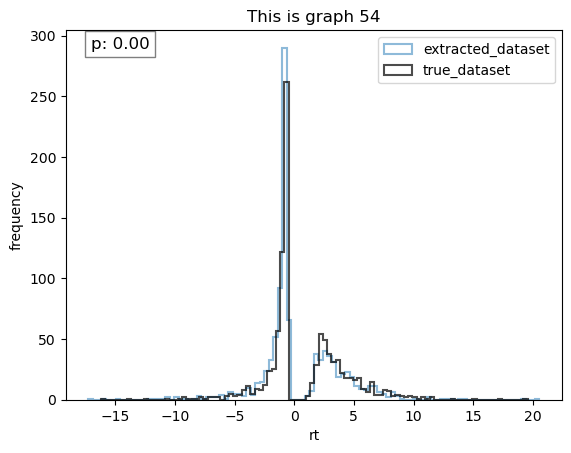

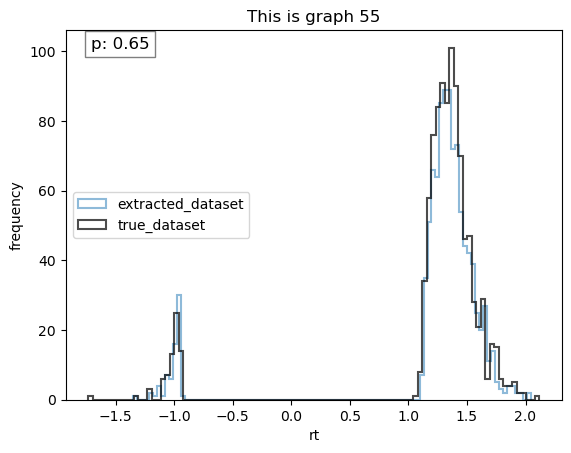

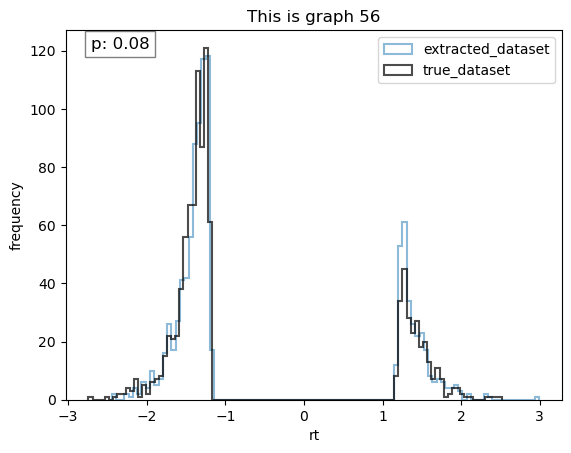

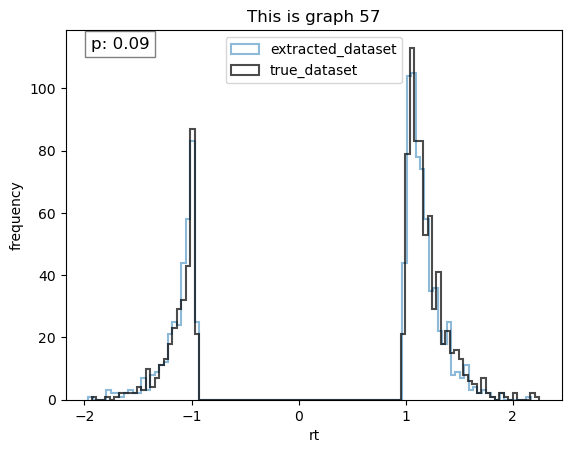

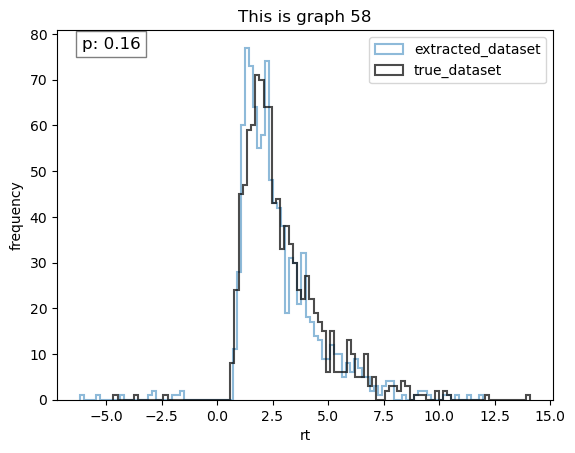

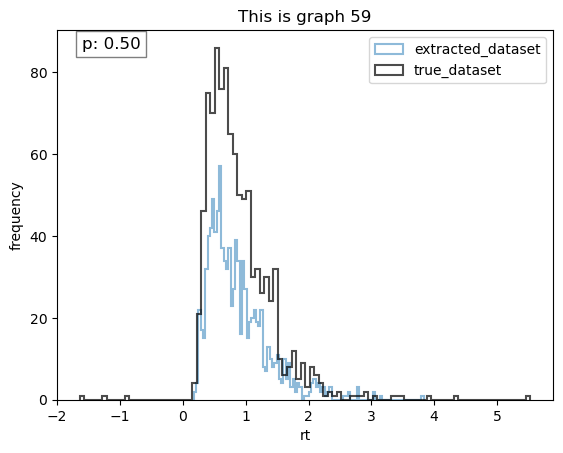

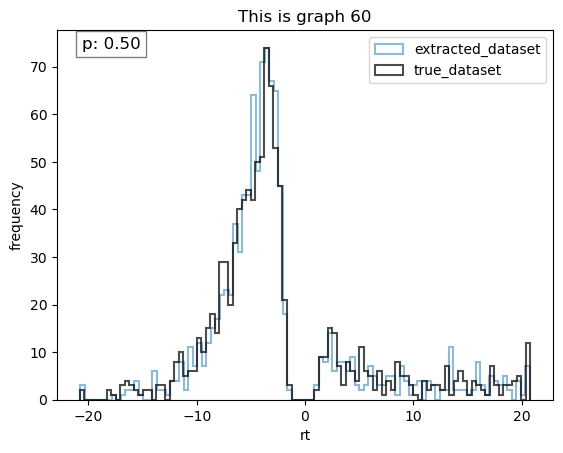

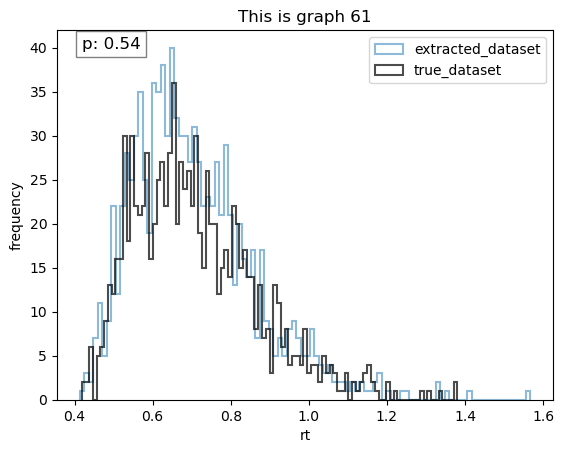

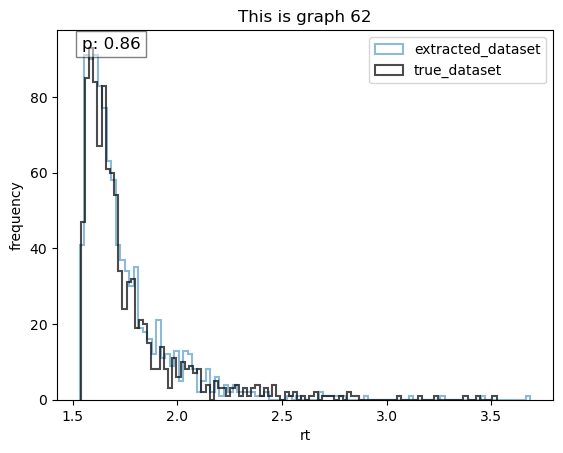

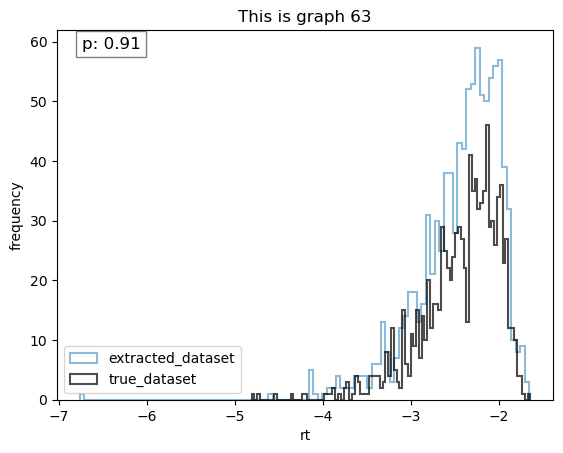

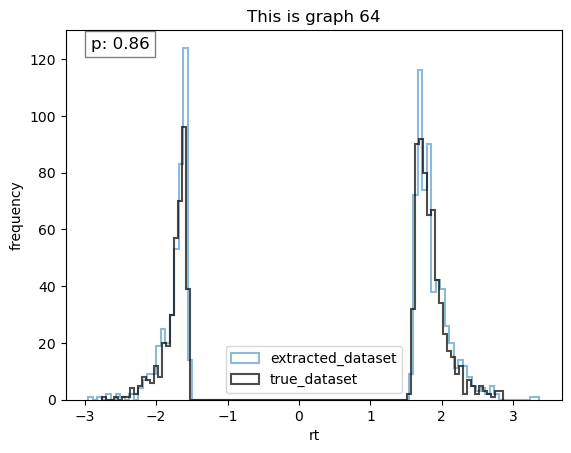

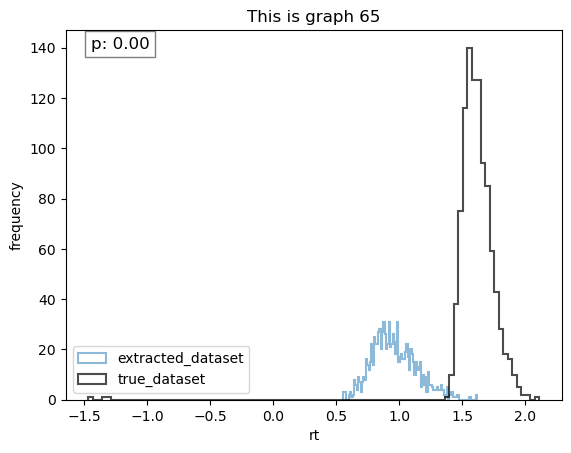

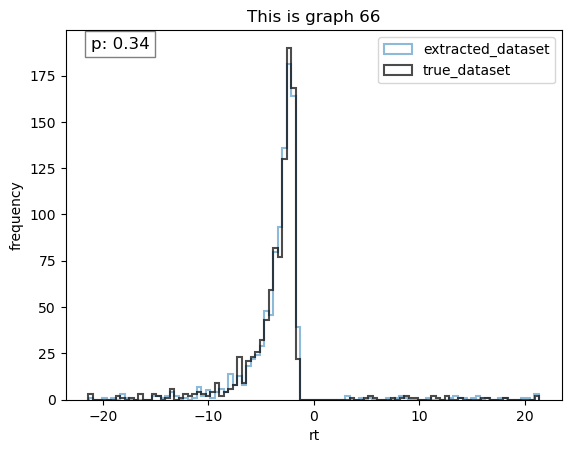

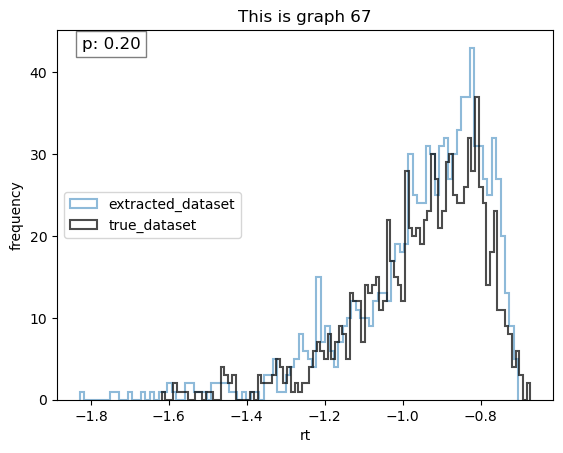

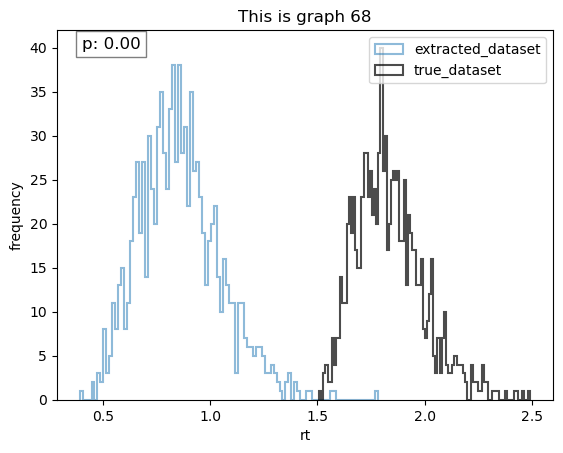

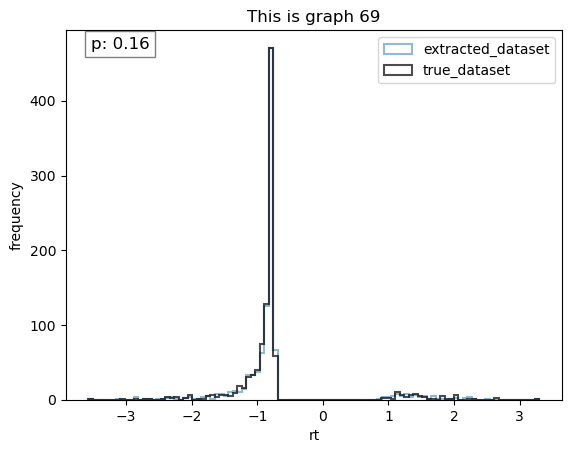

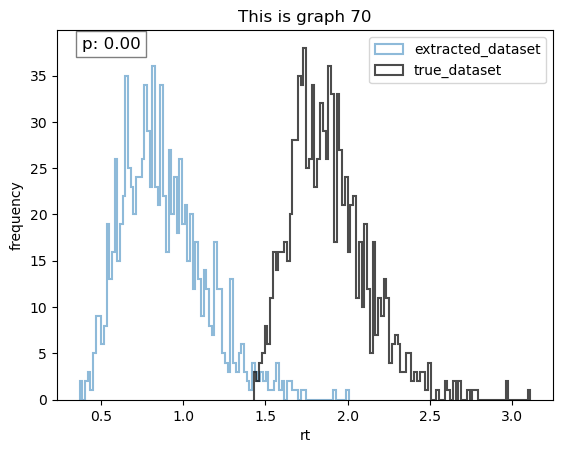

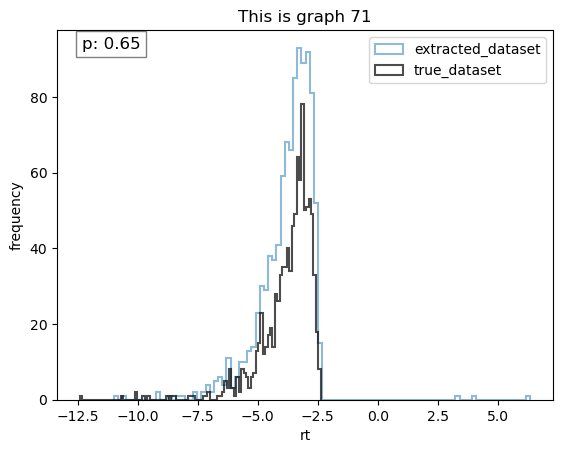

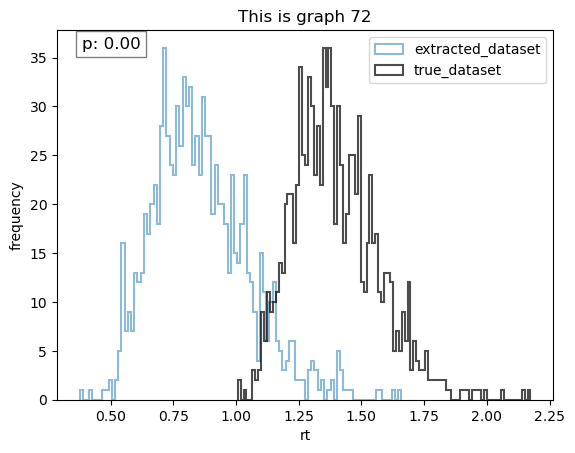

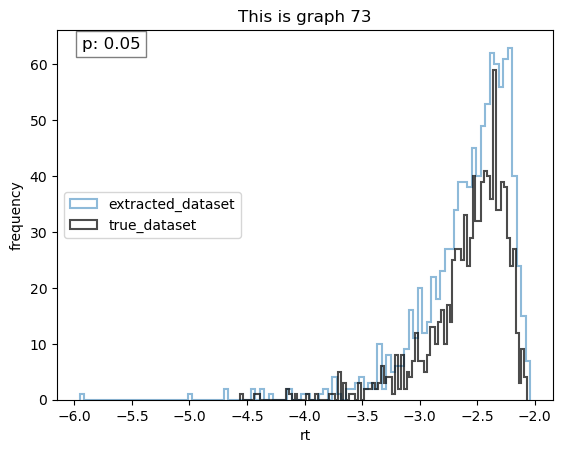

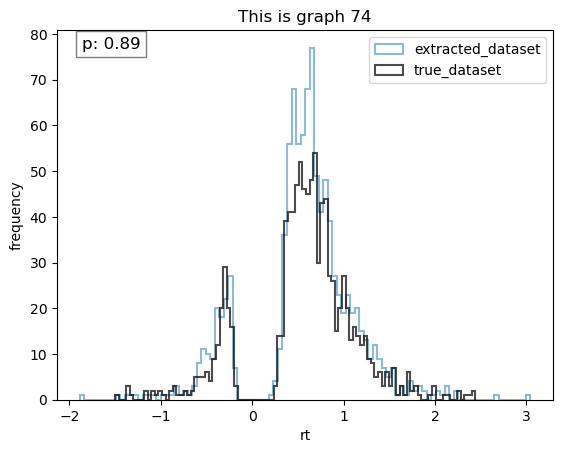

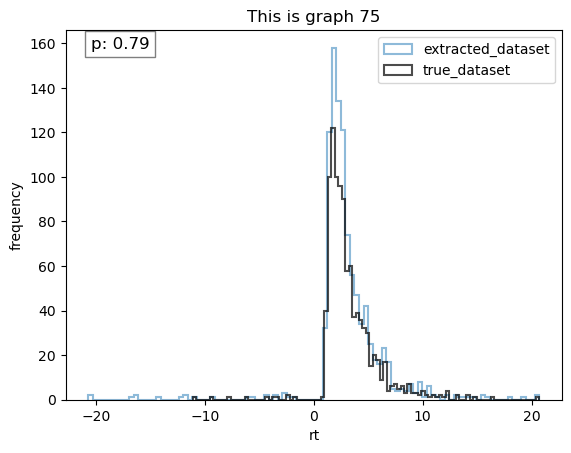

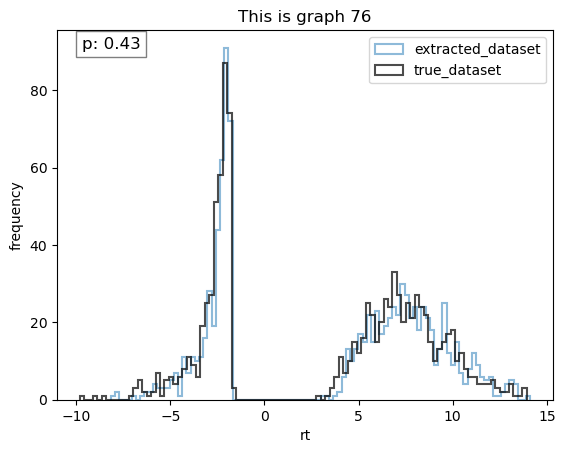

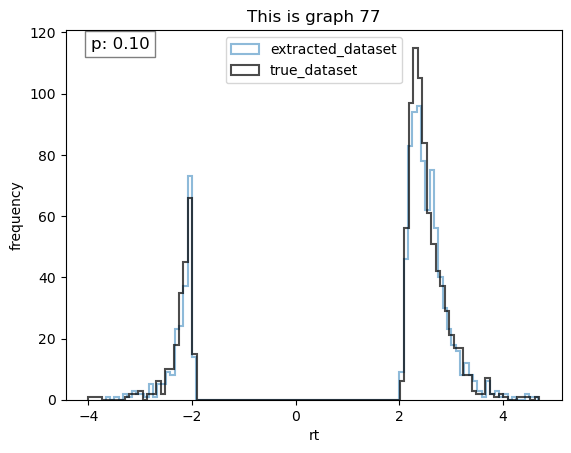

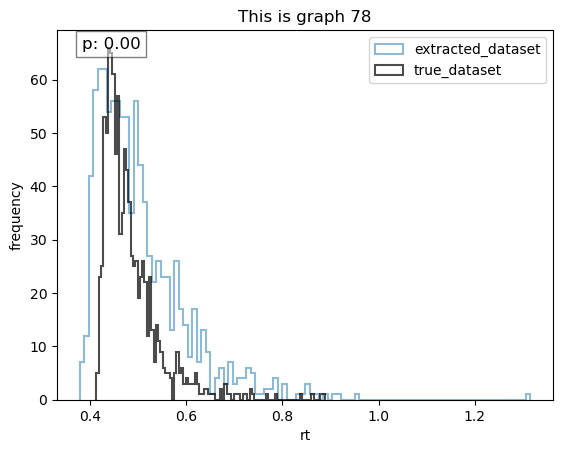

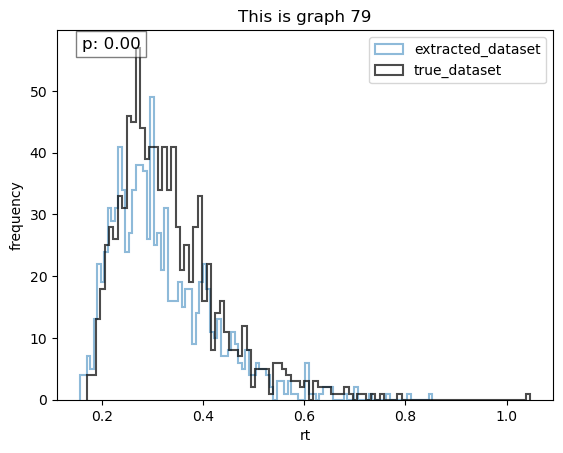

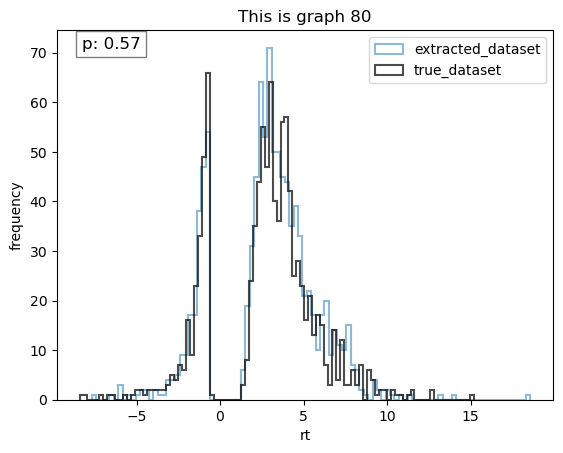

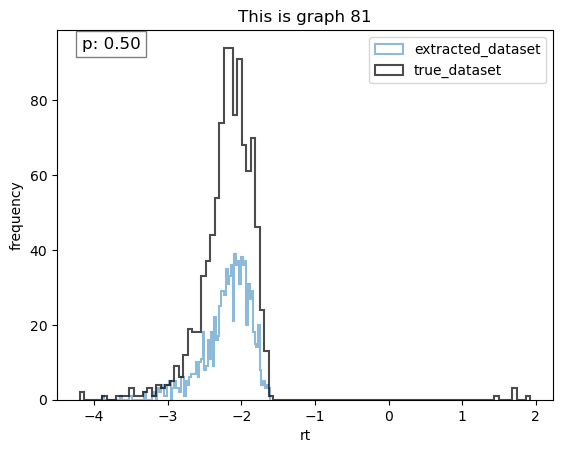

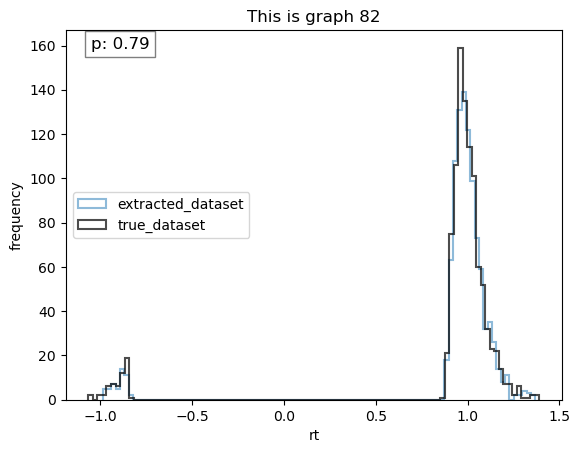

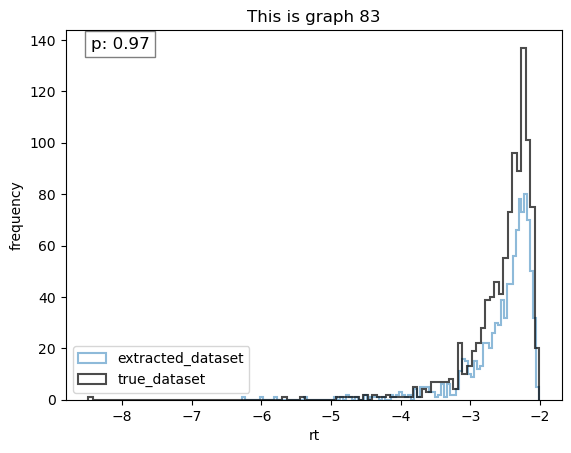

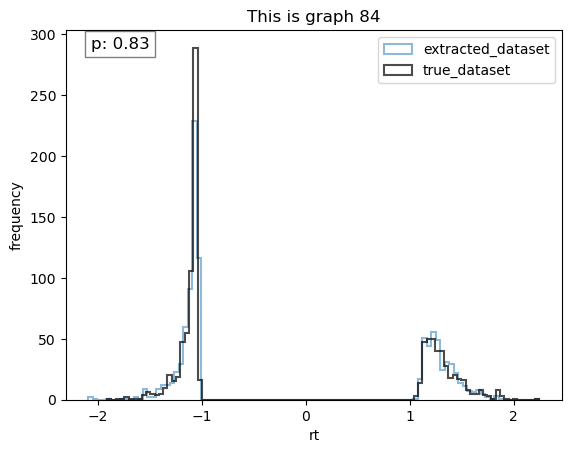

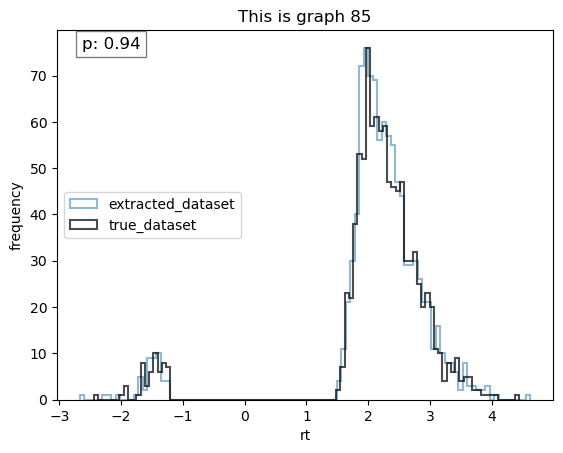

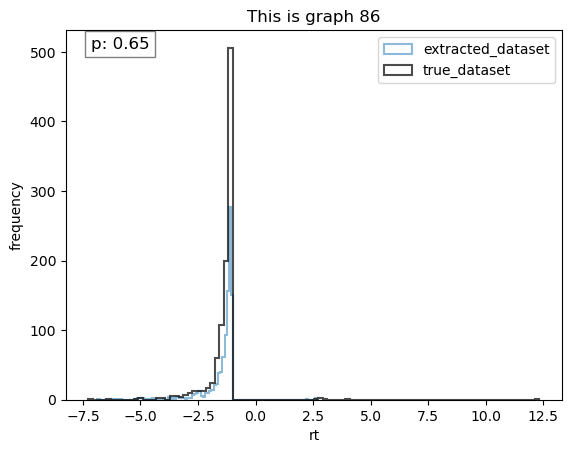

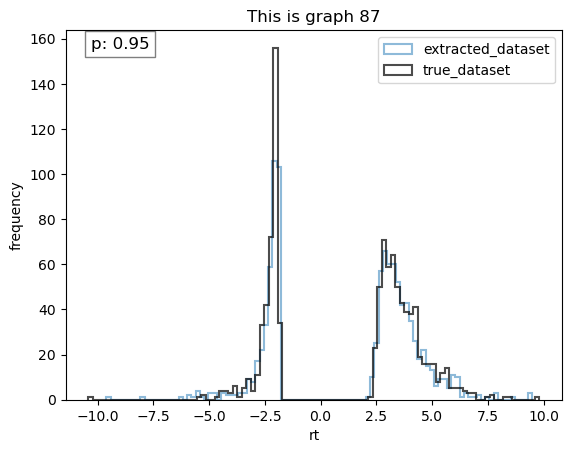

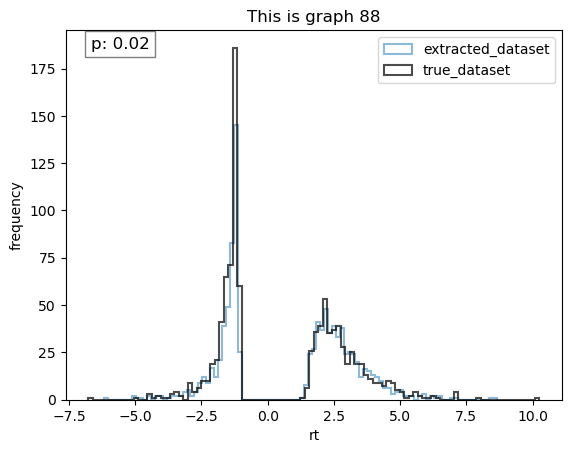

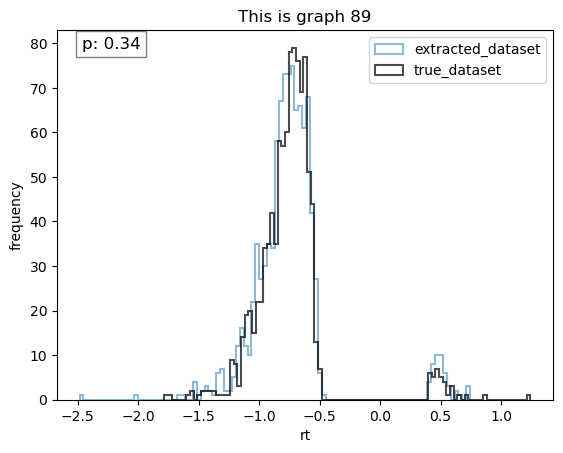

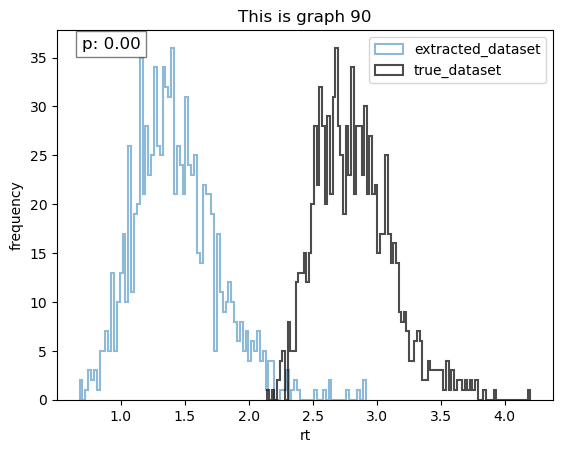

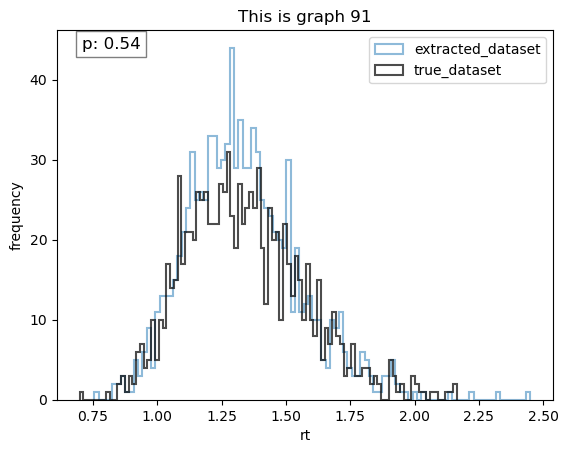

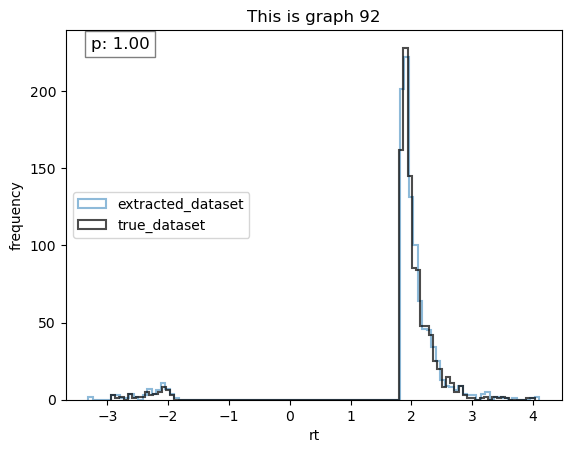

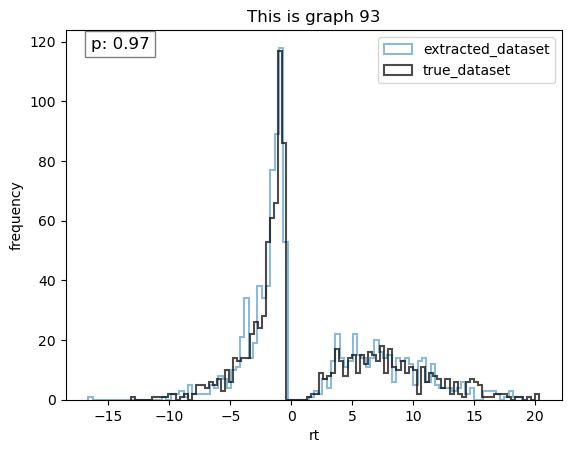

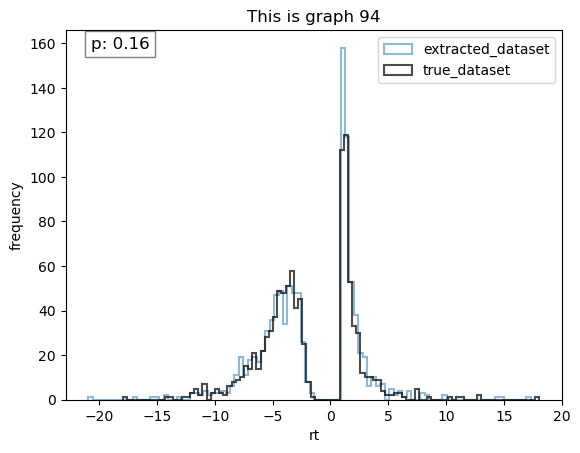

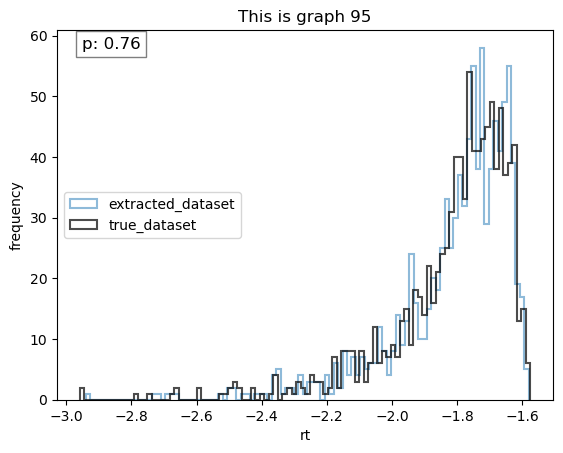

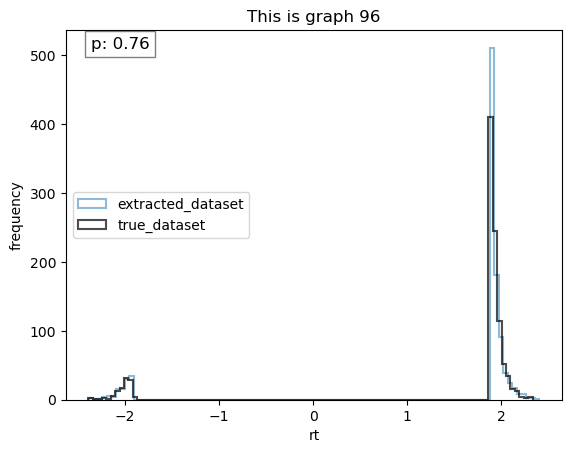

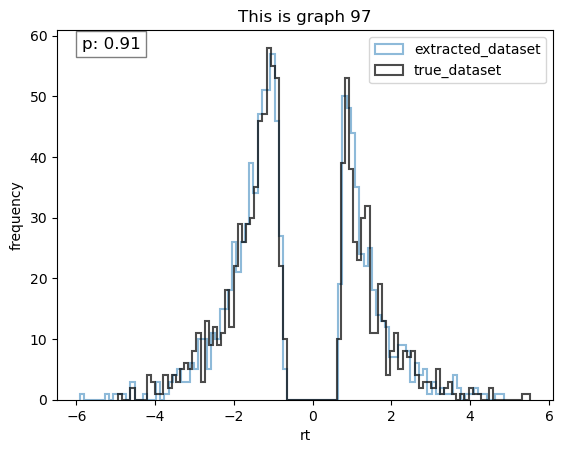

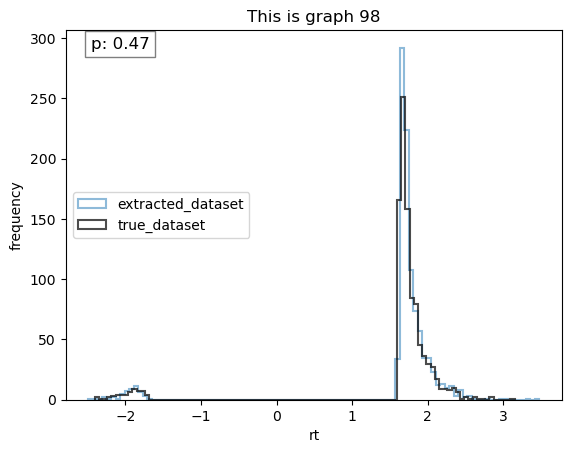

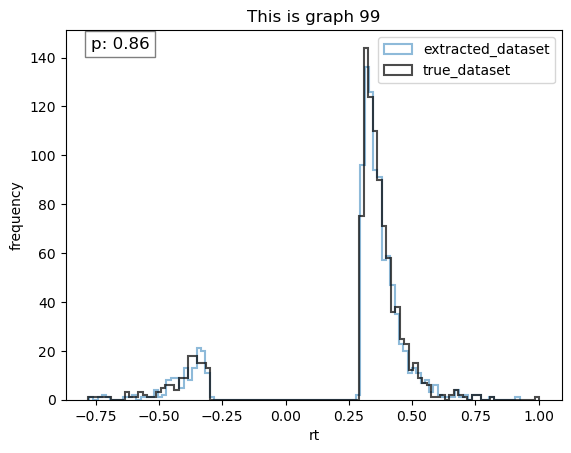

In [13]:
#forward simulation comparisons with true and estimated parameter values, also with kolmogorov smirnov test to identify p-values 

import hssm
from scipy.stats import ks_2samp



print(combined_df)
for num in range(100):
    true_theta_value = combined_df.at[num, 'true_theta']

   
    if isinstance(true_theta_value, str):
        true_theta_dict = ast.literal_eval(true_theta_value)
    else:
        true_theta_dict = true_theta_value  
    del true_theta_dict['ratio']

    print(true_theta_dict)
    true_data_set = hssm.simulate_data(model='shrink_spot',
                                        theta=true_theta_dict,
                                        size = 1000)
    compare_data_set = hssm.simulate_data(model='shrink_spot',
                                        theta={ 
                                            'a': combined_df.at[num,'est_a'], 
                                            'z': true_theta_dict['z'], 
                                            # 'z': combined_df.at[num,'z'],
                                            't': combined_df.at[num, 'est_t'], 
                                            'p_target': combined_df.at[num, 'est_target'], 
                                            'p_outer': true_theta_dict['p_outer'], 
                                            'p_inner': true_theta_dict['p_inner'], 
                                            #  'p_outer': combined_df.at[num,'p_outer_first'],
                                            #     'p_inner': combined_df.at[num,'p_inner_first'], 
                                            'r': combined_df.at[num, 'est_r'], 
                                            'sda': combined_df.at[num, 'est_sda']
                                        },
                                        size = 1000)
    
    plt.figure(num)
    plt.hist(compare_data_set['rt'] * compare_data_set['response'], bins=100, histtype = "step", alpha=0.5, label="extracted_dataset", linewidth=1.5) 
    plt.hist(true_data_set['rt'] * true_data_set['response'], bins=100, histtype = "step", alpha=0.7, label="true_dataset", color='black', linewidth=1.5)
    plt.xlabel("rt")
    plt.ylabel("frequency")
    plt.title(f"This is graph {num}")
    statistic, p_value = ks_2samp(compare_data_set['rt'] * compare_data_set['response'],true_data_set['rt'] * true_data_set['response'])
    plt.annotate(f'p: {p_value:.2f}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction', 
                 fontsize=12, 
                 backgroundcolor='white',
                 bbox=dict(facecolor='white', alpha=0.5))
    plt.legend()